<a href="https://colab.research.google.com/github/envirodatascience/final-project-urban-treeam/blob/main/GEDI_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# connecting google colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from plotnine import *
import plotnine
import geopandas as gpd
import matplotlib.pyplot as plt

#1. Define Goals of the Project
###(1.1) What question(s) are you trying to answer?


*   List item
*   List item


###(1.2) Why is this an important question(s)?


*   List item
*   List item


#2. Source Data

###   (2.1) Identify the best available data to answer your question(s).

Note: We expect you to use ‘primary’ data from a reputable source. An uncited summary table that you find on Statista is not an example of a reputable primary data source.


*   List item
*   List item


###   (2.2) Acknowledge the limitations of the data available
(i.e. is the best available data a proxy for the idea data to answer your question?)

*   The GEDI is limited in its coverage and resolution.
*   List item

### (2.3) Ingest your data for cleaning and analysis in Colab.

*   List item
*   List item

#3. Clean and Analyze Data

### (3.1)Load, QA, and combine data

*   List item
*   List item

###Build models or summaries

*   List item
*   List item

#4. Synthesize Findings Through Visualization

###Create plots, maps, or selected stats to succinctly summarize findings

*   List item
*   List item

#5. Answer Research Question

###How do the findings inform the project question(s)?

*   List item
*   List item

###What follow-up questions are there?

*   List item
*   List item

###What next steps could you take to further the analysis?

*   List item
*   List item

https://ieeexplore.ieee.org/document/9432712



---



#Section 1:

###(1.1) What question(s) are you trying to answer?


*   How does canopy tree cover vary by height and total coverage across New Haven's neighborhoods?
*   How can satellite based LIDAR data supplement on-ground data collection to better understand the current tree stock in New Haven?

###(1.2) Why is this an important question(s)?


*   On-ground data collection can be incomplete and ill-equipped to accurately and efficiently measure tree canopy height and coverage, particularly at scale.

*   Identifying effective satellite based monitoring methods have important ramifications in other applications such as monitoring illegal logging and deforestation efforts at a global scale.



---


#2. Source Data

###   (2.1) Identify the best available data to answer your question(s).

Note: We expect you to use ‘primary’ data from a reputable source. An uncited summary table that you find on Statista is not an example of a reputable primary data source.


*   The best sensor data to capture foliage elevation is LIDAR, which is traditionally mounted on a single engine plane and collected via low elevation flyovers of target regions.
*   NASA and UMD jointly managed the GEDI program which utilizes a LIDAR sensor mounted on the International Space Station. (insert link)


###   (2.2) Acknowledge the limitations of the data available
(i.e. is the best available data a proxy for the idea data to answer your question?)

*   The GEDI sensor data is limited in its coverage and resolution. At a resolution of approximately 25m per pixel, the resolution is unable to detect smaller trees and variations in foliage height and density in forested areas.
*   Due to the fact the sensor is mounted on the ISS, data collection is limited to its orbital pattern. Thus, complete coverage of relatively small  geographical areas (such as New Haven city limits) is not feasible. For context, the data used in this notebook consists of data from 20 orbital patterns that occured by the ISS over New Haven's general proximity in 2019. As a result, the data creates a relatively sparsely cross-hatched pattern of sensor readings laid in a grid across the region.

### (2.3) Ingest your data for cleaning and analysis in Colab

In [3]:
# Producing errors, use alternative method via Drive
#gedi_url = 'https://github.com/envirodatascience/final-project-urban-treeam/blob/12f62e63822106e11f3d544890cd2656336404f3/gedi_output.csv'
#df= pd.read_csv(gedi_url, on_bad_lines='skip')

In [34]:
# Read in path
dataset = '/content/drive/MyDrive/GEDI_project/gedi_output.csv'
df = pd.read_csv(dataset)



---

#3. Clean and Analyze Data

### (3.1) Load, QA, and combine data



In [35]:
# Check shape of dataframe
df.shape

(14882, 10)

In [36]:
# Check data head
df.head()

latitude_bin0  longitude_bin0  algorithmrun_flag   cover  l2b_quality_flag  \
0      41.298829      -72.991474                  0 -9999.0                 0   
1      41.299132      -72.990924                  0 -9999.0                 0   
2      41.299436      -72.990373                  0 -9999.0                 0   
3      41.299739      -72.989822                  0 -9999.0                 0   
4      41.300043      -72.989271                  0 -9999.0                 0   

   omega  rh100  landsat_treecover  urban_proportion         shot_number  
0    1.0      0               43.0                39  173890000200274263  
1    1.0      0               15.0                56  173890000200274264  
2    1.0      0               50.0                 1  173890000200274265  
3    1.0      0               45.0                 0  173890000200274266  
4    1.0      0               49.0                 0  173890000200274267


### (3.1.1) Variable legend
*   **latitude_bin0:**
	Latitude of first bin of the pgap_theta_z, interpolated from L1B waveform coordinate
*   **longitude_bin0:** Longitude of first bin of the pgap_theta_z, interpolated from L1B waveform coordinate
*   **algorithmrun_flag:** The L2B algorithm is run if this flag is set to 1. This flag selects data which have sufficient waveform fidelity for L2B to run.
*   **cover:** Total canopy cover, defined as the percent of the ground covered by the vertical projection of canopy material
*   **l2b_quality_flag:** Flag simpilfying selection of most useful data for Level 2B
*   **omega:** Foliage clumping index
*   **rh100:** Height above ground of the received waveform signal start (rh[101] from L2A) units = cm.
*   **landsat_treecover:** Tree cover in the year 2010, defined as canopy closure for all vegetation taller than 5m in height (Hansen et al.). Encoded as a percentage per output grid cell.
*  **urban_proportion:** The percentage proportion of land area within a focal area surrounding each shot that is urban land cover. Urban land cover is derived from the DLR 12 m resolution TanDEM-X Global Urban Footprint Product.
*   **shot_number:** Unique shot ID.

Source: [USGS LPDAAC](https://lpdaac.usgs.gov/documents/980/gedi_l2b_dictionary_P003_v2.html)



In [37]:
# Get df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14882 entries, 0 to 14881
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latitude_bin0      14882 non-null  float64
 1   longitude_bin0     14882 non-null  float64
 2   algorithmrun_flag  14882 non-null  int64  
 3   cover              14882 non-null  float64
 4   l2b_quality_flag   14882 non-null  int64  
 5   omega              14882 non-null  float64
 6   rh100              14882 non-null  int64  
 7   landsat_treecover  14882 non-null  float64
 8   urban_proportion   14882 non-null  int64  
 9   shot_number        14882 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 1.1 MB


In [38]:
# check column names
df.columns

Index(['latitude_bin0', 'longitude_bin0', 'algorithmrun_flag', 'cover',
       'l2b_quality_flag', 'omega', 'rh100', 'landsat_treecover',
       'urban_proportion', 'shot_number'],
      dtype='object')

In [39]:
# Clean column names
new_names = {'latitude_bin0': 'latitude', 'longitude_bin0': 'longitude', 'cover': 'pct_canopy_cover', 'omega': 'foliage_clumping_idx', 'Utility Wire Conflict':'Wire', 'rh100': 'height_above_ground_m', 'shot_number': 'uid'}

In [40]:
# Rename columns
df = df.rename(columns=new_names)

In [41]:
# Convert height_above_ground_m (rh100) from cm to meters
df.height_above_ground_m = df.height_above_ground_m/100

In [42]:
# Check renaming
df.head()

latitude  longitude  algorithmrun_flag  pct_canopy_cover  \
0  41.298829 -72.991474                  0           -9999.0   
1  41.299132 -72.990924                  0           -9999.0   
2  41.299436 -72.990373                  0           -9999.0   
3  41.299739 -72.989822                  0           -9999.0   
4  41.300043 -72.989271                  0           -9999.0   

   l2b_quality_flag  foliage_clumping_idx  height_above_ground_m  \
0                 0                   1.0                    0.0   
1                 0                   1.0                    0.0   
2                 0                   1.0                    0.0   
3                 0                   1.0                    0.0   
4                 0                   1.0                    0.0   

   landsat_treecover  urban_proportion                 uid  
0               43.0                39  173890000200274263  
1               15.0                56  173890000200274264  
2               50.0                 1  173890000200274265  
3               45.0                 0  173890000200274266  
4               49.0                 0  173890000200274267

### (3.1.2) Data QA and Cleaning

In [43]:
# Check num rows with -9999 pct_canopy_cover
(df['pct_canopy_cover'] == -9999).sum()

7381

There are 7381 rows with a -9999 value out of 14882 total. Let's drop these and make a histogram of the remaining values of pct_canopy_cover which is the "total canopy cover, defined as the percent of the ground covered by the vertical projection of canopy material."

In [44]:
# Drop all -9999 pct_canopy_cover rows
df = df[df['pct_canopy_cover']!=-9999]
df.head()

latitude  longitude  algorithmrun_flag  pct_canopy_cover  \
2062  41.304665 -72.965580                  1          0.836306   
2415  41.288566 -72.895731                  1          0.015877   
2416  41.288870 -72.895182                  1          0.021565   
2417  41.289176 -72.894630                  1          0.004627   
2418  41.289478 -72.894083                  1          0.028282   

      l2b_quality_flag  foliage_clumping_idx  height_above_ground_m  \
2062                 0                   1.0                  38.99   
2415                 0                   1.0                   4.59   
2416                 0                   1.0                   3.53   
2417                 0                   1.0                   3.21   
2418                 0                   1.0                   3.09   

      landsat_treecover  urban_proportion                 uid  
2062                0.0                62  155440800200274174  
2415               18.0                43   85140000200273528  
2416               39.0                55   85140000200273529  
2417                0.0                73   85140000200273530  
2418                0.0                84   85140000200273531

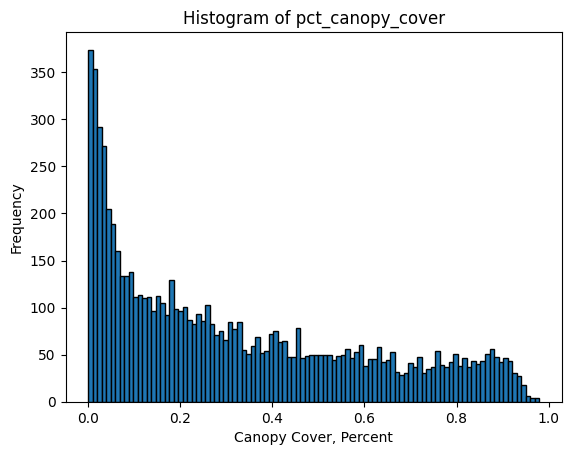

In [45]:
# Check histogram of pct_canopy_cover
df['pct_canopy_cover'].plot(kind='hist',  bins = 100, edgecolor='black')
# Adding labels and title
plt.xlabel('Canopy Cover, Percent')
plt.ylabel('Frequency')
plt.title('Histogram of pct_canopy_cover')

# Show the plot
plt.show()

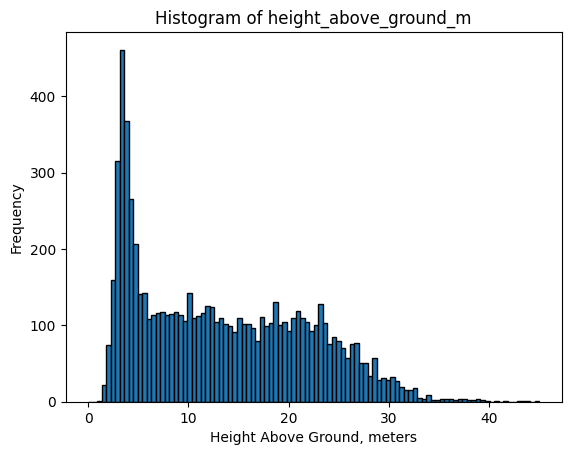

In [46]:
# Check histogram of height_above_ground_m
df['height_above_ground_m'].plot(kind='hist', range=[0,45], bins = 100, edgecolor='black')
# Adding labels and title
plt.xlabel('Height Above Ground, meters')
plt.ylabel('Frequency')
plt.title('Histogram of height_above_ground_m')

# Show the plot
plt.show()

There appears to be a considerable amount of data being collected for foliage with a height of less than 1 meter. This could be due to random signal noise near the surface, or due to bushes and small plants. Let's drop these values  to focus data on data likely produced by trees.

In [47]:
# Filter out height_above_ground_m values below 1m
df = df[df['height_above_ground_m'] > 1]

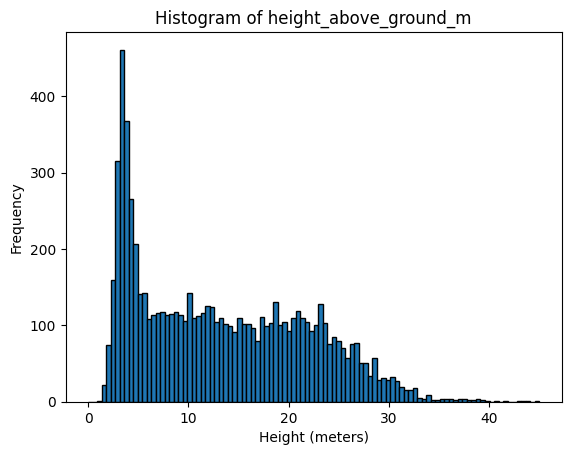

In [48]:
# Check histogram with cleaned height_above_ground_m values
df['height_above_ground_m'].plot(kind='hist', bins = 100, range=[0,45], edgecolor='black')

# Adding labels and title
plt.xlabel('Height (meters)')
plt.ylabel('Frequency')
plt.title('Histogram of height_above_ground_m')

# Show the plot
plt.show()

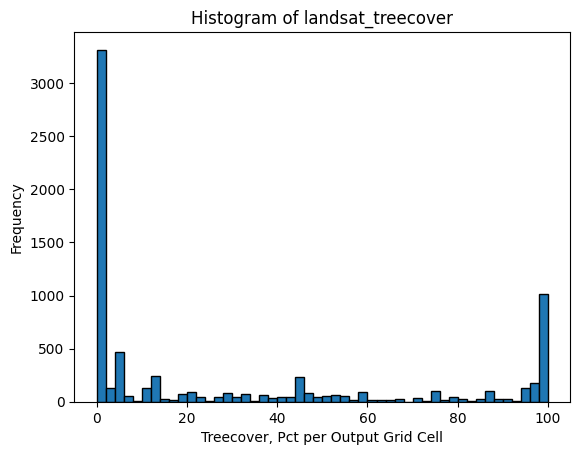

In [49]:
# Check histogram of continuous variables
df['landsat_treecover'].plot(kind='hist', bins = 50, edgecolor='black')

# Adding labels and title
plt.xlabel('Treecover, Pct per Output Grid Cell')
plt.ylabel('Frequency')
plt.title('Histogram of landsat_treecover')

# Show the plot
plt.show()

There appears to be a very large number of values at or near 0. Let's restrict the range and investigate further.

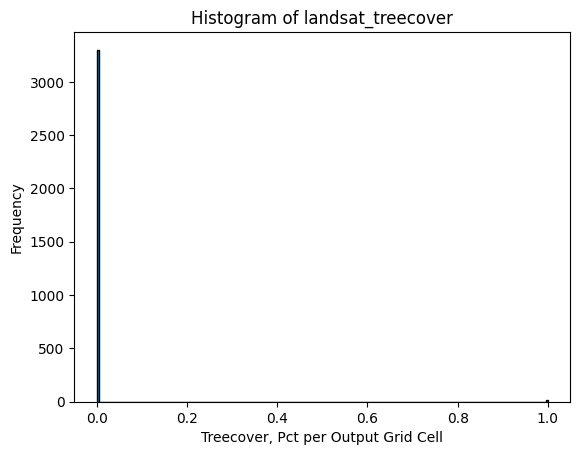

In [50]:
# Check histogram of continuous variables between 0 and 1
df['landsat_treecover'].plot(kind='hist', bins = 200, range=[0,1], edgecolor='black')

# Adding labels and title
plt.xlabel('Treecover, Pct per Output Grid Cell')
plt.ylabel('Frequency')
plt.title('Histogram of landsat_treecover')

# Show the plot
plt.show()

In [51]:
# how many landsat_treecover values are not 0
(df['landsat_treecover'] != 0).sum()

4200

In [52]:
# how many landsat_treecover values are 0
(df['landsat_treecover'] == 0).sum()

3301

About half of the values equal 0, but this is not out of the question, considering the built environment, fields, etc. We will leave the values for now.

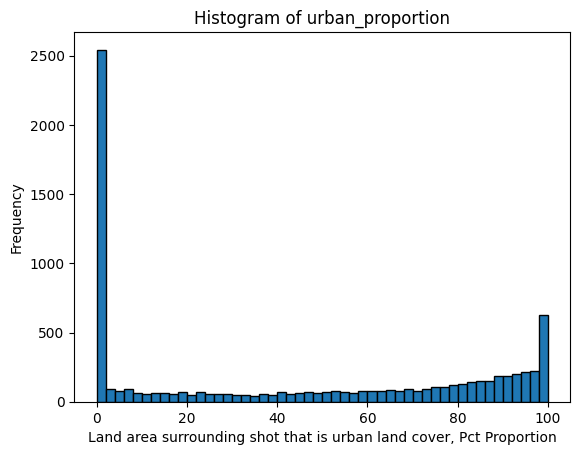

In [53]:
# Check histogram of urban_proportion variable
df['urban_proportion'].plot(kind='hist', bins = 50, edgecolor='black')

# Adding labels and title
plt.xlabel('Land area surrounding shot that is urban land cover, Pct Proportion')
plt.ylabel('Frequency')
plt.title('Histogram of urban_proportion')

# Show the plot
plt.show()

There appears to be a large number of 0 values and 100 % values. Following similar logic to the landsat_treecover variable above, we will leave the values.

In [54]:
# Check unique values of foliage clumping index
df.foliage_clumping_idx.unique()

array([1.])

This column seems to only contain 1 value. It doesn't have any immediate application for our analysis, so we can drop it.

In [55]:
# drop foliage_clumping_idx
df.drop(columns=['foliage_clumping_idx'], inplace=True)

### (3.1.3) Data Exploration & Visualization

In [56]:
# Explore via Geopandas
# Unzip amd read data
! wget "https://github.com/envirodatascience/final-project-urban-treeam/raw/main/Neighborhoods.zip"
! unzip /content/Neighborhoods.zip

--2024-04-29 06:14:01--  https://github.com/envirodatascience/final-project-urban-treeam/raw/main/Neighborhoods.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/envirodatascience/final-project-urban-treeam/main/Neighborhoods.zip [following]
--2024-04-29 06:14:01--  https://raw.githubusercontent.com/envirodatascience/final-project-urban-treeam/main/Neighborhoods.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75192 (73K) [application/zip]
Saving to: ‘Neighborhoods.zip.1’

Neighborhoods.zip.1 100%[===================>]  73.43K  --.-KB/s    in 0.01s   

2024-04-29 06:14:02 (5.62 MB/s) - ‘Nei

In [57]:
# read New Haven neighborhood shapefiles
nei = "/content/New_Haven_CT_Neighborhoods.shp"
nei = gpd.read_file(nei)

In [58]:
# Rename columns
nei.rename(columns={'Neighbor_1': 'Neighborhood'}, inplace=True)

In [59]:
# Check data
nei.head()

OBJECTID   ACRES      Neighborho    Neighborhood    Shape_area  \
0         5  157.59  WOOSTER SQUARE  Wooster Square  6.864538e+06   
1         8  202.58          DWIGHT          Dwight  8.824339e+06   
2         4  226.58      MILL RIVER      Mill River  9.869794e+06   
3        10  237.69        EDGEWOOD        Edgewood  1.035363e+07   
4         9  302.08        DOWNTOWN        Downtown  1.315854e+07   

      Shape_len    Shape__Are   Shape__Len UTC_2016  \
0  11664.198825  1.131120e+06  4735.843104      .15   
1  15305.198643  1.454318e+06  6212.201826      .19   
2  20202.451032  1.626513e+06  8205.143156      .15   
3  14738.643104  1.706680e+06  5985.096078      .34   
4  16821.576475  2.168458e+06  6828.556824      .17   

                                            geometry  
0  POLYGON ((-8116803.095 5058012.940, -8116797.5...  
1  POLYGON ((-8119801.427 5059109.589, -8119667.0...  
2  POLYGON ((-8115322.615 5059153.789, -8115422.5...  
3  POLYGON ((-8119911.510 5059160.851, -8119977.4...  
4  POLYGON ((-8118173.770 5058949.906, -8118143.2...

In [60]:
# check CRS for nei dataframe
nei.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [61]:
# Sync workflow with Les' colab
# Eliminate Wooster Square and Mill River Neighborhoods
clean_nei = nei[~nei["Neighborhood"].isin(["Wooster Square", "Mill River"])]

In [62]:
# check if drop worked
clean_nei.Neighborhood.unique()

array(['Dwight', 'Edgewood', 'Downtown', 'Dixwell', 'Newhallville',
       'Prospect Hill', 'West River', 'Beaver Hills', 'Amity',
       'Long Wharf', 'Fair Haven', 'East Rock', 'Fair Haven Heights',
       'West Rock', 'Annex', 'Hill', 'Quinnipiac Meadows', 'East Shore',
       'Westville'], dtype=object)

In [63]:
# Check total number of neighborhoods
clean_nei.shape

(19, 10)

In [64]:
# Check nei col names
clean_nei.columns

Index(['OBJECTID', 'ACRES', 'Neighborho', 'Neighborhood', 'Shape_area',
       'Shape_len', 'Shape__Are', 'Shape__Len', 'UTC_2016', 'geometry'],
      dtype='object')

In [65]:
# Check data
clean_nei.head()

OBJECTID   ACRES    Neighborho  Neighborhood    Shape_area     Shape_len  \
1         8  202.58        DWIGHT        Dwight  8.824339e+06  15305.198643   
3        10  237.69      EDGEWOOD      Edgewood  1.035363e+07  14738.643104   
4         9  302.08      DOWNTOWN      Downtown  1.315854e+07  16821.576475   
5         7  336.78       DIXWELL       Dixwell  1.475696e+07  18107.206310   
6        15  404.97  NEWHALLVILLE  Newhallville  1.755389e+07  17958.127066   

     Shape__Are   Shape__Len UTC_2016  \
1  1.454318e+06  6212.201826      .19   
3  1.706680e+06  5985.096078      .34   
4  2.168458e+06  6828.556824      .17   
5  2.432593e+06  7350.678432      .21   
6  2.894634e+06  7292.602047      .32   

                                            geometry  
1  POLYGON ((-8119801.427 5059109.589, -8119667.0...  
3  POLYGON ((-8119911.510 5059160.851, -8119977.4...  
4  POLYGON ((-8118173.770 5058949.906, -8118143.2...  
5  POLYGON ((-8119801.427 5059109.589, -8119911.5...  
6  POLYGON ((-8119597.914 5062001.929, -8119528.5...

In [66]:
# Drop unnecessary columns
nei_pre_merge = clean_nei.drop(columns=['OBJECTID', 'Neighborho', 'Shape_area', 'Shape_len', 'Shape__Are', 'Shape__Len', 'UTC_2016'])

In [67]:
# Check post drop columns
nei_pre_merge.head()

ACRES  Neighborhood                                           geometry
1  202.58        Dwight  POLYGON ((-8119801.427 5059109.589, -8119667.0...
3  237.69      Edgewood  POLYGON ((-8119911.510 5059160.851, -8119977.4...
4  302.08      Downtown  POLYGON ((-8118173.770 5058949.906, -8118143.2...
5  336.78       Dixwell  POLYGON ((-8119801.427 5059109.589, -8119911.5...
6  404.97  Newhallville  POLYGON ((-8119597.914 5062001.929, -8119528.5...

In [68]:
# Check CRS for nei dataframe
nei_pre_merge.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Using our original 'df' dataframe, we need to convert it to a geopandas dataframe using the latitude and longitude columns and setting the inital CRS to EPSG:4326.

In [69]:
# Create geometry column on the GEDI dataframe, use crs 4326 to sync with lat/long columns
geo_gedi_df = gpd.geopandas.GeoDataFrame(df, geometry=gpd.geopandas.points_from_xy(df.longitude, df.latitude, crs="EPSG:4326"))

In [70]:
# Check geo conversion
geo_gedi_df.head()

latitude  longitude  algorithmrun_flag  pct_canopy_cover  \
2062  41.304665 -72.965580                  1          0.836306   
2415  41.288566 -72.895731                  1          0.015877   
2416  41.288870 -72.895182                  1          0.021565   
2417  41.289176 -72.894630                  1          0.004627   
2418  41.289478 -72.894083                  1          0.028282   

      l2b_quality_flag  height_above_ground_m  landsat_treecover  \
2062                 0                  38.99                0.0   
2415                 0                   4.59               18.0   
2416                 0                   3.53               39.0   
2417                 0                   3.21                0.0   
2418                 0                   3.09                0.0   

      urban_proportion                 uid                    geometry  
2062                62  155440800200274174  POINT (-72.96558 41.30466)  
2415                43   85140000200273528  POINT (-72.89573 41.28857)  
2416                55   85140000200273529  POINT (-72.89518 41.28887)  
2417                73   85140000200273530  POINT (-72.89463 41.28918)  
2418                84   85140000200273531  POINT (-72.89408 41.28948)

We now have a geometry column of points using the ERS:4326 CRS, next we will recast the CRS to merge with the New Haven neighborhood shapefile.

In [71]:
# Convert CRS to 3857 to match neighborhood data
geo_gedi_df = geo_gedi_df.to_crs("EPSG:3857")

In [72]:
# Check CRS conversion
geo_gedi_df.head()

latitude  longitude  algorithmrun_flag  pct_canopy_cover  \
2062  41.304665 -72.965580                  1          0.836306   
2415  41.288566 -72.895731                  1          0.015877   
2416  41.288870 -72.895182                  1          0.021565   
2417  41.289176 -72.894630                  1          0.004627   
2418  41.289478 -72.894083                  1          0.028282   

      l2b_quality_flag  height_above_ground_m  landsat_treecover  \
2062                 0                  38.99                0.0   
2415                 0                   4.59               18.0   
2416                 0                   3.53               39.0   
2417                 0                   3.21                0.0   
2418                 0                   3.09                0.0   

      urban_proportion                 uid                          geometry  
2062                62  155440800200274174  POINT (-8122491.213 5057384.019)  
2415                43   85140000200273528  POINT (-8114715.709 5054998.761)  
2416                55   85140000200273529  POINT (-8114654.546 5055043.788)  
2417                73   85140000200273530  POINT (-8114593.064 5055089.128)  
2418                84   85140000200273531  POINT (-8114532.240 5055133.798)

In [73]:
# confirm both dfs are same CRS
geo_gedi_df.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [74]:
nei_pre_merge.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [75]:
# Check neighborhood geo data
nei_pre_merge.head()

ACRES  Neighborhood                                           geometry
1  202.58        Dwight  POLYGON ((-8119801.427 5059109.589, -8119667.0...
3  237.69      Edgewood  POLYGON ((-8119911.510 5059160.851, -8119977.4...
4  302.08      Downtown  POLYGON ((-8118173.770 5058949.906, -8118143.2...
5  336.78       Dixwell  POLYGON ((-8119801.427 5059109.589, -8119911.5...
6  404.97  Newhallville  POLYGON ((-8119597.914 5062001.929, -8119528.5...

The GEDI data was collected using a square bounding box around greater New Haven. Before restricting the GEDI datapoints to those inside New Haven neighborhood boundaries, let's look at all the data collected in the bounding box using a left join.

In [76]:
# left merge to see all sat values in original polygon incl outside NH borders
merged_df = geo_gedi_df.sjoin(nei_pre_merge, how='left')
merged_df.head()

latitude  longitude  algorithmrun_flag  pct_canopy_cover  \
2062  41.304665 -72.965580                  1          0.836306   
2415  41.288566 -72.895731                  1          0.015877   
2416  41.288870 -72.895182                  1          0.021565   
2417  41.289176 -72.894630                  1          0.004627   
2418  41.289478 -72.894083                  1          0.028282   

      l2b_quality_flag  height_above_ground_m  landsat_treecover  \
2062                 0                  38.99                0.0   
2415                 0                   4.59               18.0   
2416                 0                   3.53               39.0   
2417                 0                   3.21                0.0   
2418                 0                   3.09                0.0   

      urban_proportion                 uid                          geometry  \
2062                62  155440800200274174  POINT (-8122491.213 5057384.019)   
2415                43   85140000200273528  POINT (-8114715.709 5054998.761)   
2416                55   85140000200273529  POINT (-8114654.546 5055043.788)   
2417                73   85140000200273530  POINT (-8114593.064 5055089.128)   
2418                84   85140000200273531  POINT (-8114532.240 5055133.798)   

      index_right   ACRES Neighborhood  
2062          NaN     NaN          NaN  
2415         16.0  877.07        Annex  
2416         16.0  877.07        Annex  
2417         16.0  877.07        Annex  
2418         16.0  877.07        Annex

In [77]:
# We have 7501 todal LIDAR sensor readings in the bounding box
merged_df.shape

(7501, 13)

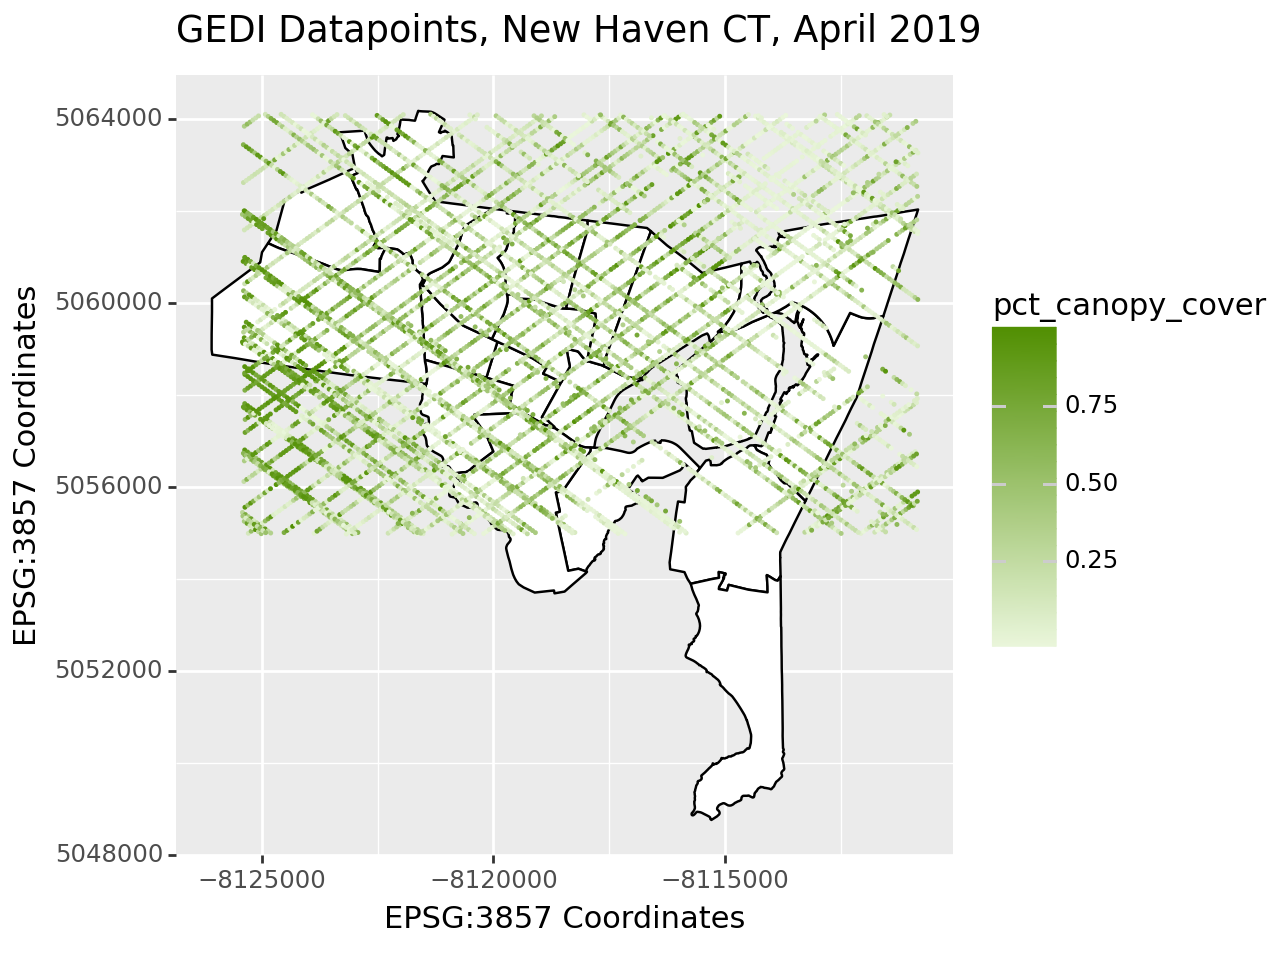

<Figure Size: (640 x 480)>

In [79]:
# Plot all pct_canopy_cover values collected from GEDI
(
  ggplot()
   + geom_map(nei_pre_merge, fill = 'white', color = 'black')
   + geom_map(merged_df, aes(geometry='geometry', fill="pct_canopy_cover"),color=None)
   + scale_fill_gradient(low="#eaf6db", high="#518f02")
    + xlab("EPSG:3857 Coordinates")
    + ylab("EPSG:3857 Coordinates")
    + ggtitle("GEDI Datapoints, New Haven CT, April 2019")
)


The cross-hatch pattern of datapoints is due to the fact the GEDI LiDAR sensor is mounted to the International Space Station (vs a geostationary satellite) and thus the data is limited to collection during ISS flyovers.

Note: regretably, the southernmost neighborhood was not captured within the initial GEDI bounding box coordinates.

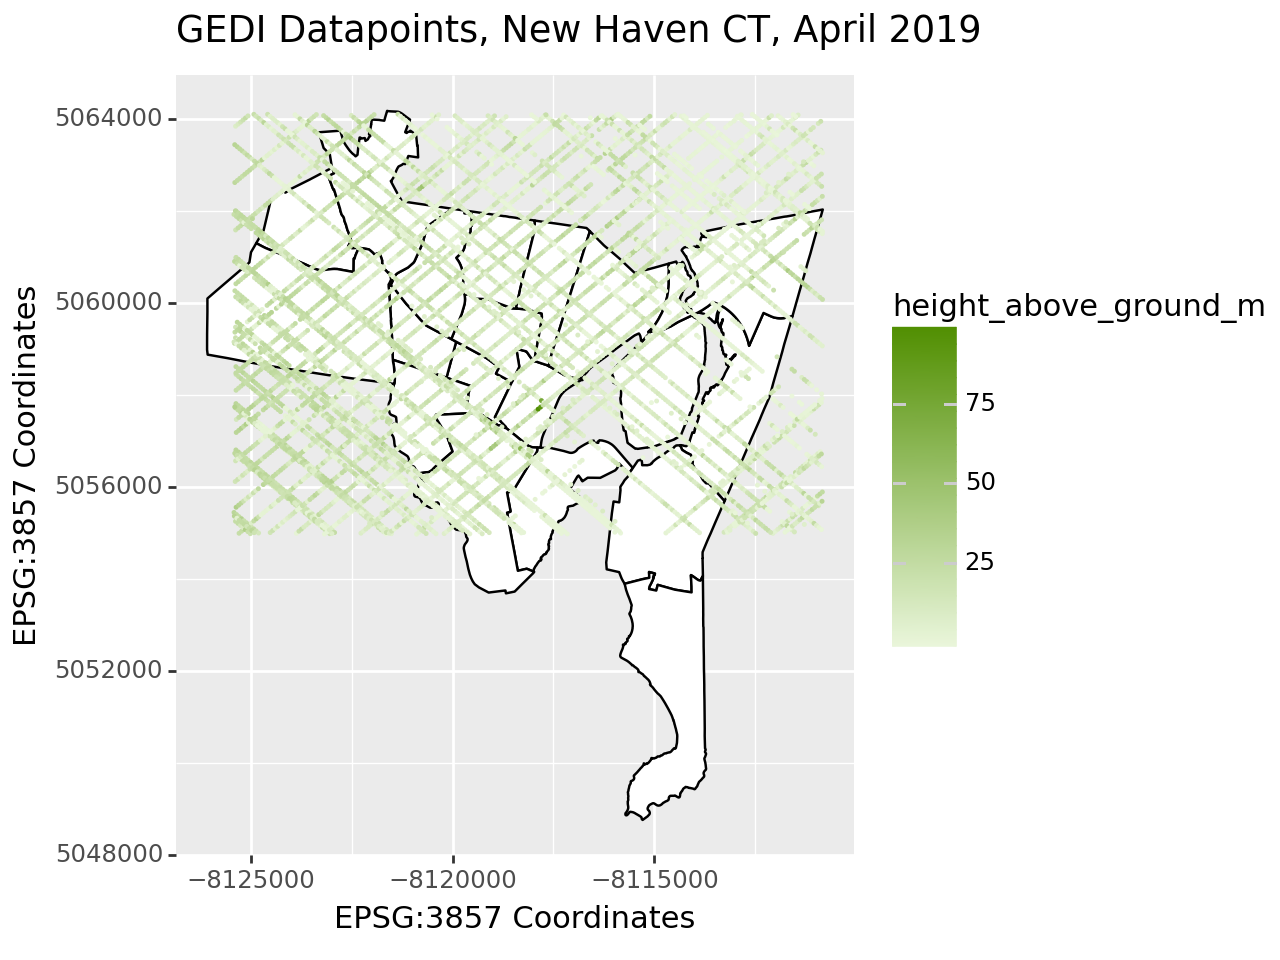

<Figure Size: (640 x 480)>

In [80]:
# TODO temporary plot with values > 40 removed, confirm with Les

# Plot all pct_canopy_cover values collected from GEDI
(
  ggplot()
   + geom_map(nei_pre_merge, fill = 'white', color = 'black')
   + geom_map(merged_df, aes(geometry='geometry', fill="height_above_ground_m"),color=None)
   + scale_fill_gradient(low="#eaf6db", high="#518f02")
   + xlab("EPSG:3857 Coordinates")
   + ylab("EPSG:3857 Coordinates")
   + ggtitle("GEDI Datapoints, New Haven CT, April 2019")
)

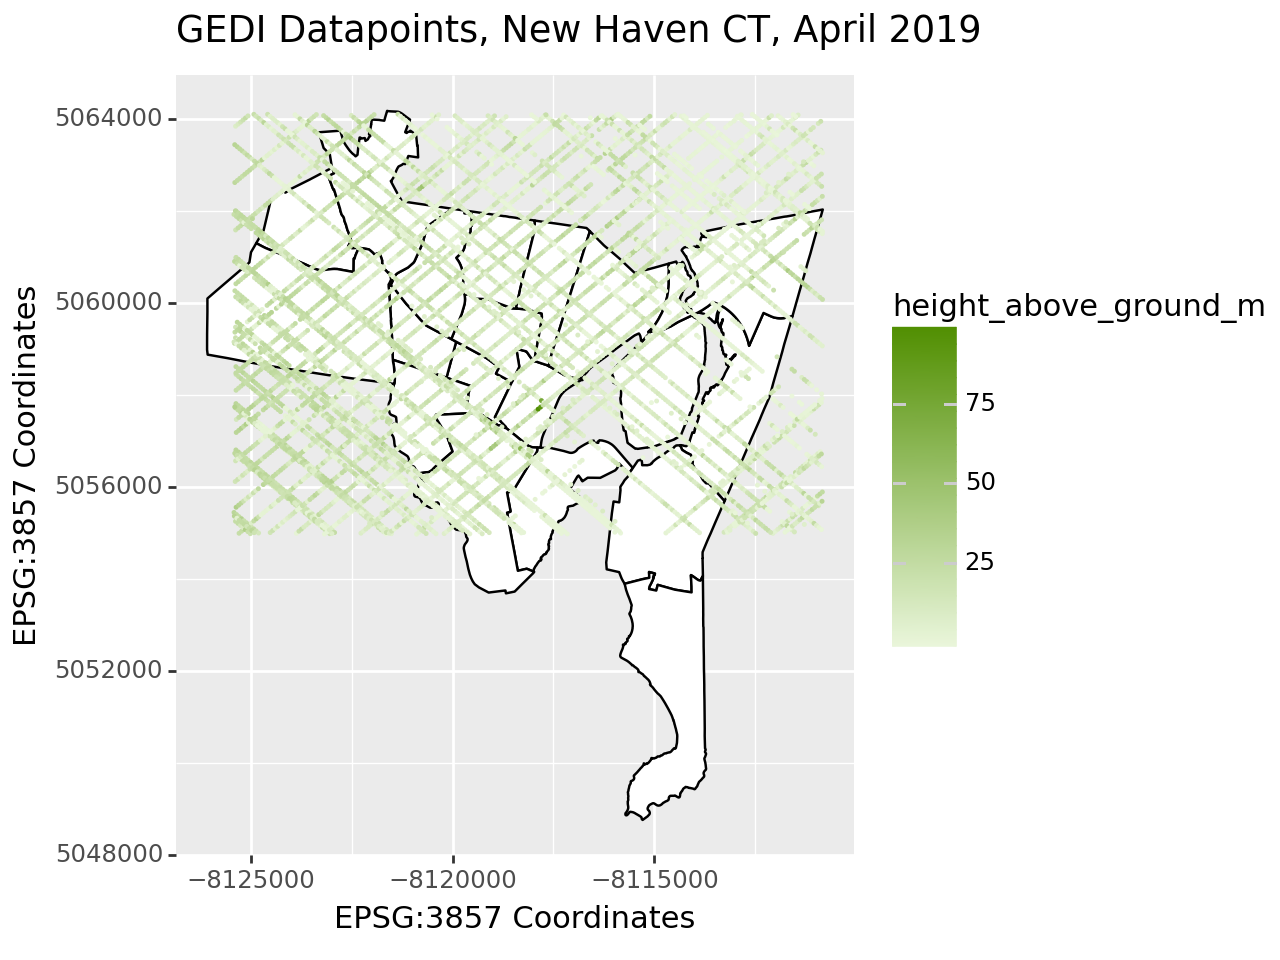

<Figure Size: (640 x 480)>

In [82]:
# Plot all pct_canopy_cover values collected from GEDI
(
  ggplot()
   + geom_map(nei_pre_merge, fill = 'white', color = 'black')
   + geom_map(merged_df, aes(geometry='geometry', fill="height_above_ground_m"),color=None)
   + scale_fill_gradient(low="#eaf6db", high="#518f02")
   + xlab("EPSG:3857 Coordinates")
   + ylab("EPSG:3857 Coordinates")
   + ggtitle("GEDI Datapoints, New Haven CT, April 2019")
)

Now we will merge using an inner merge to restrict the data points to those inside the New Haven neighborhood geometry polygons using a spatial join.

In [83]:
# New inner merge approach
merged_inner_df = geo_gedi_df.sjoin(nei_pre_merge, how='inner')
merged_inner_df.head()

latitude  longitude  algorithmrun_flag  pct_canopy_cover  \
2415  41.288566 -72.895731                  1          0.015877   
2416  41.288870 -72.895182                  1          0.021565   
2417  41.289176 -72.894630                  1          0.004627   
2418  41.289478 -72.894083                  1          0.028282   
2419  41.289774 -72.893545                  1          0.644540   

      l2b_quality_flag  height_above_ground_m  landsat_treecover  \
2415                 0                   4.59               18.0   
2416                 0                   3.53               39.0   
2417                 0                   3.21                0.0   
2418                 0                   3.09                0.0   
2419                 0                  17.59                0.0   

      urban_proportion                uid                          geometry  \
2415                43  85140000200273528  POINT (-8114715.709 5054998.761)   
2416                55  85140000200273529  POINT (-8114654.546 5055043.788)   
2417                73  85140000200273530  POINT (-8114593.064 5055089.128)   
2418                84  85140000200273531  POINT (-8114532.240 5055133.798)   
2419                67  85140000200273532  POINT (-8114472.267 5055177.608)   

      index_right   ACRES Neighborhood  
2415           16  877.07        Annex  
2416           16  877.07        Annex  
2417           16  877.07        Annex  
2418           16  877.07        Annex  
2419           16  877.07        Annex

In [84]:
merged_inner_df.shape

(3992, 13)

There are 3992 GEDI datapoints that are from within a New Haven neighborhood.

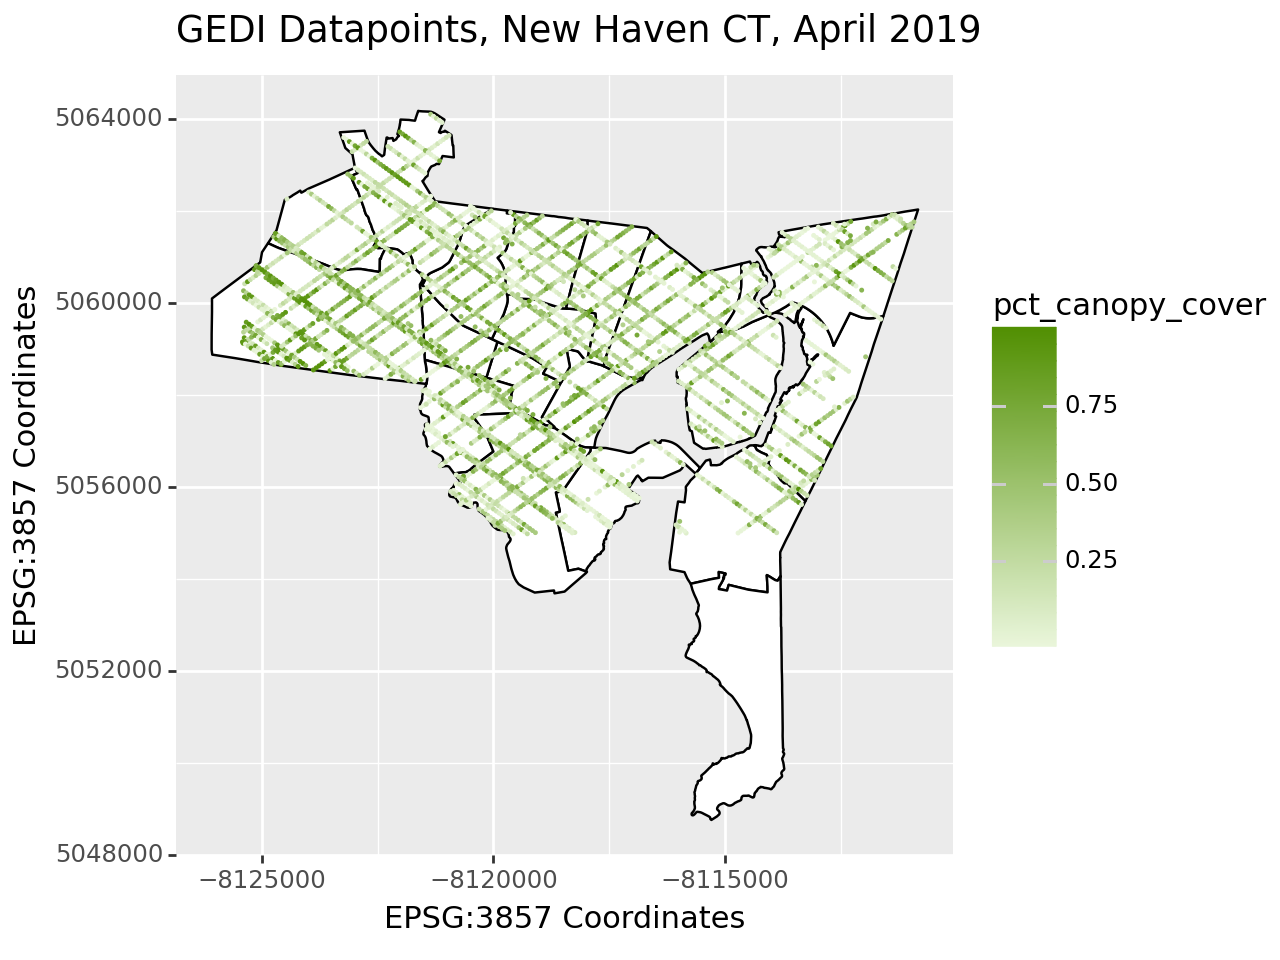

<Figure Size: (640 x 480)>

In [86]:
# check graph of pct_canopy_cover using inner join
(
  ggplot()
   + geom_map(nei_pre_merge, fill = 'white', color = 'black')
   + geom_map(merged_inner_df, aes(geometry='geometry', fill="pct_canopy_cover"),color=None)
   + scale_fill_gradient(low="#eaf6db", high="#518f02")
   + xlab("EPSG:3857 Coordinates")
   + ylab("EPSG:3857 Coordinates")
   + ggtitle("GEDI Datapoints, New Haven CT, April 2019")
)


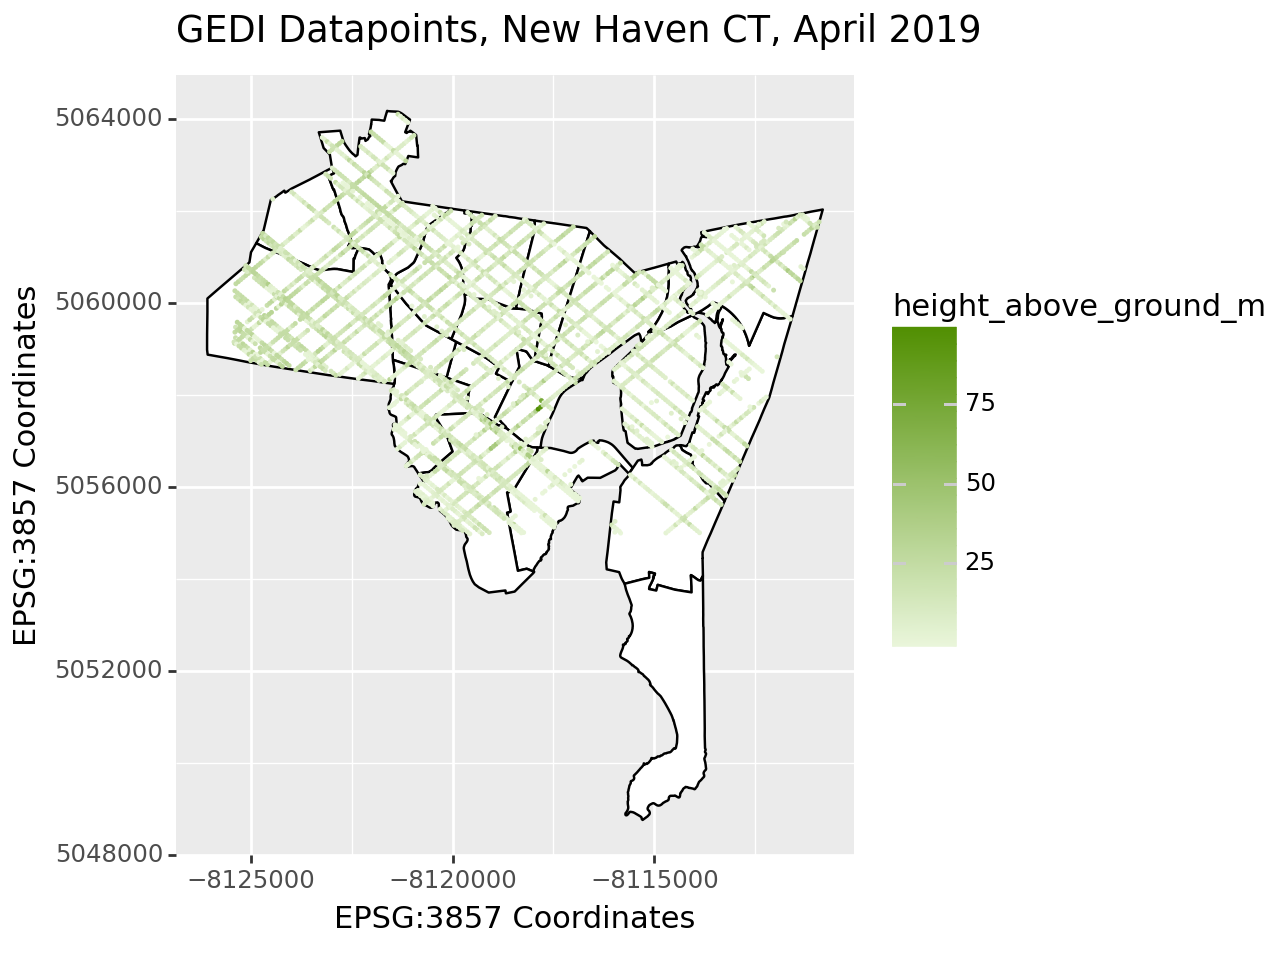

<Figure Size: (640 x 480)>

In [88]:
# check graph of height_above_ground_m using inner join
(
  ggplot()
   + geom_map(nei_pre_merge, fill = 'white', color = 'black')
   + geom_map(merged_inner_df, aes(geometry='geometry', fill="height_above_ground_m"),color=None)
   + scale_fill_gradient(low="#eaf6db", high="#518f02")
   + xlab("EPSG:3857 Coordinates")
   + ylab("EPSG:3857 Coordinates")
   + ggtitle("GEDI Datapoints, New Haven CT, April 2019")
)

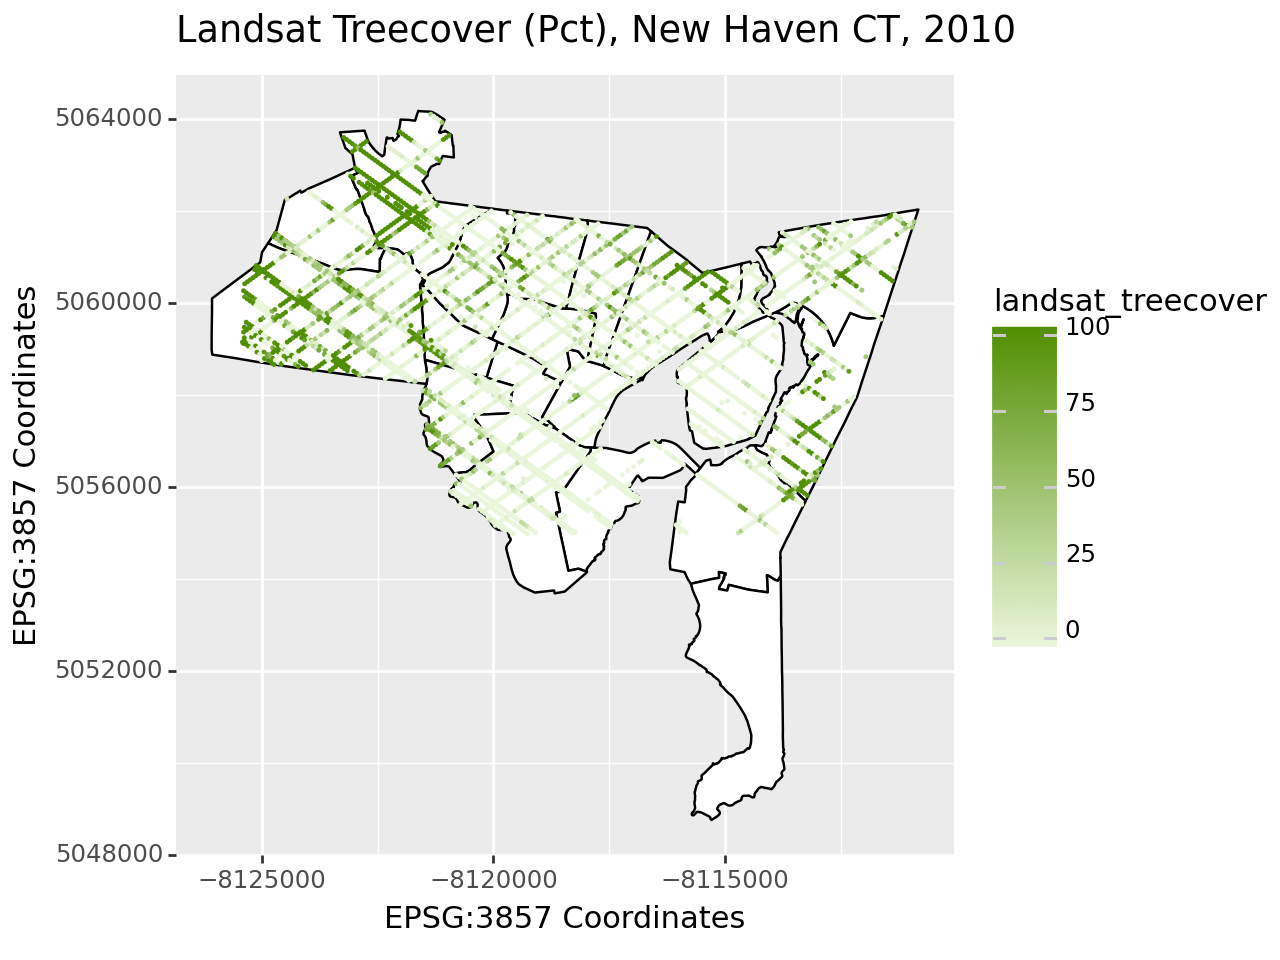

<Figure Size: (640 x 480)>

In [149]:
# check graph of height_above_ground_m using inner join
(
  ggplot()
   + geom_map(nei_pre_merge, fill = 'white', color = 'black')
   + geom_map(merged_inner_df, aes(geometry='geometry', fill="landsat_treecover"),color=None)
   + scale_fill_gradient(low="#eaf6db", high="#518f02")
   + xlab("EPSG:3857 Coordinates")
   + ylab("EPSG:3857 Coordinates")
   + ggtitle("Landsat Treecover (Pct), New Haven CT, 2010")
)

In [92]:
merged_inner_df.shape

(3992, 13)

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

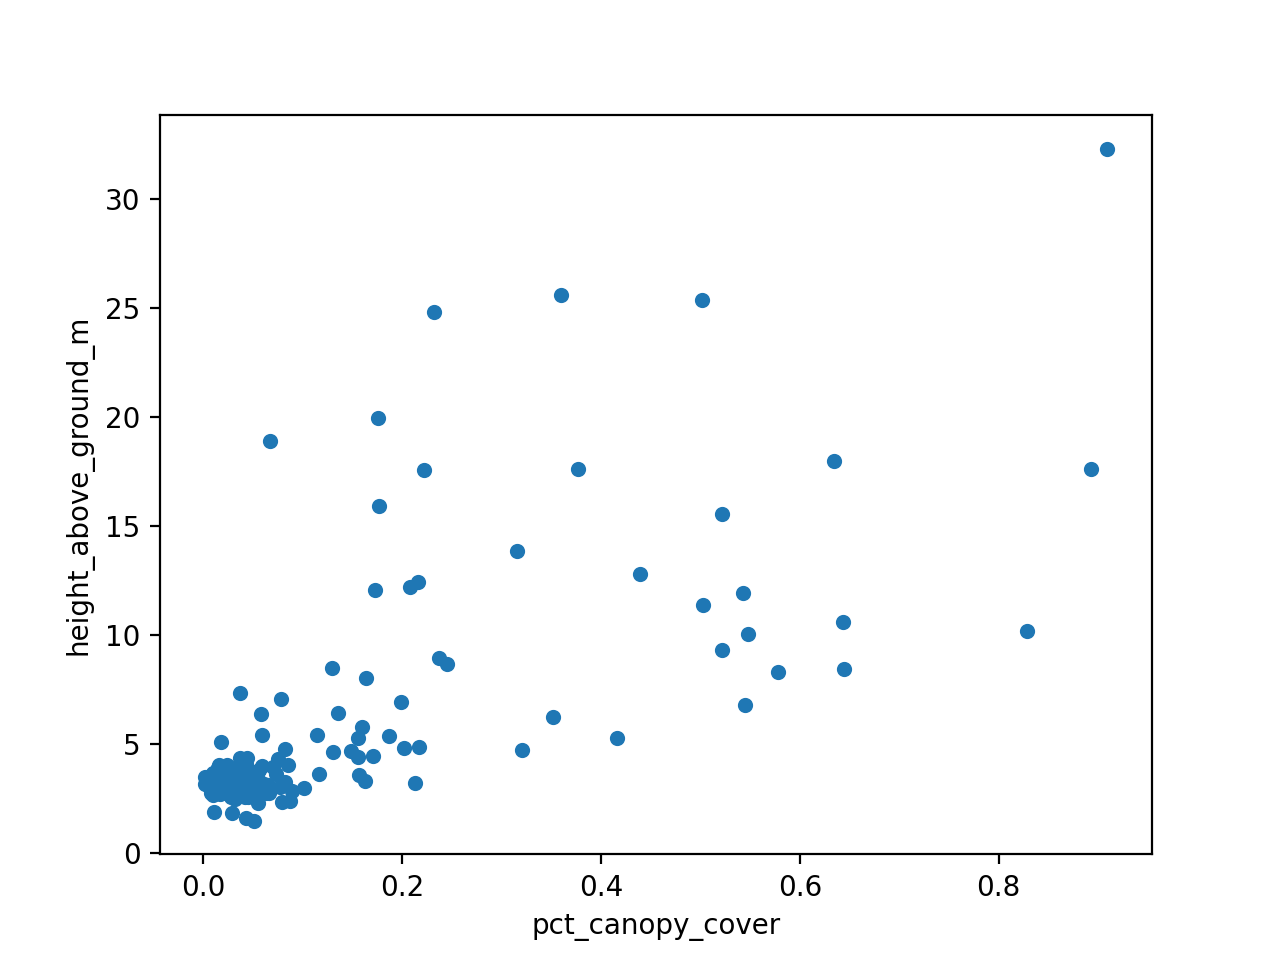

In [111]:
# south of downtown, near water, includes IKEA, mostly industrial or commercial
merged_inner_df[merged_inner_df['Neighborhood'] == 'Long Wharf'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

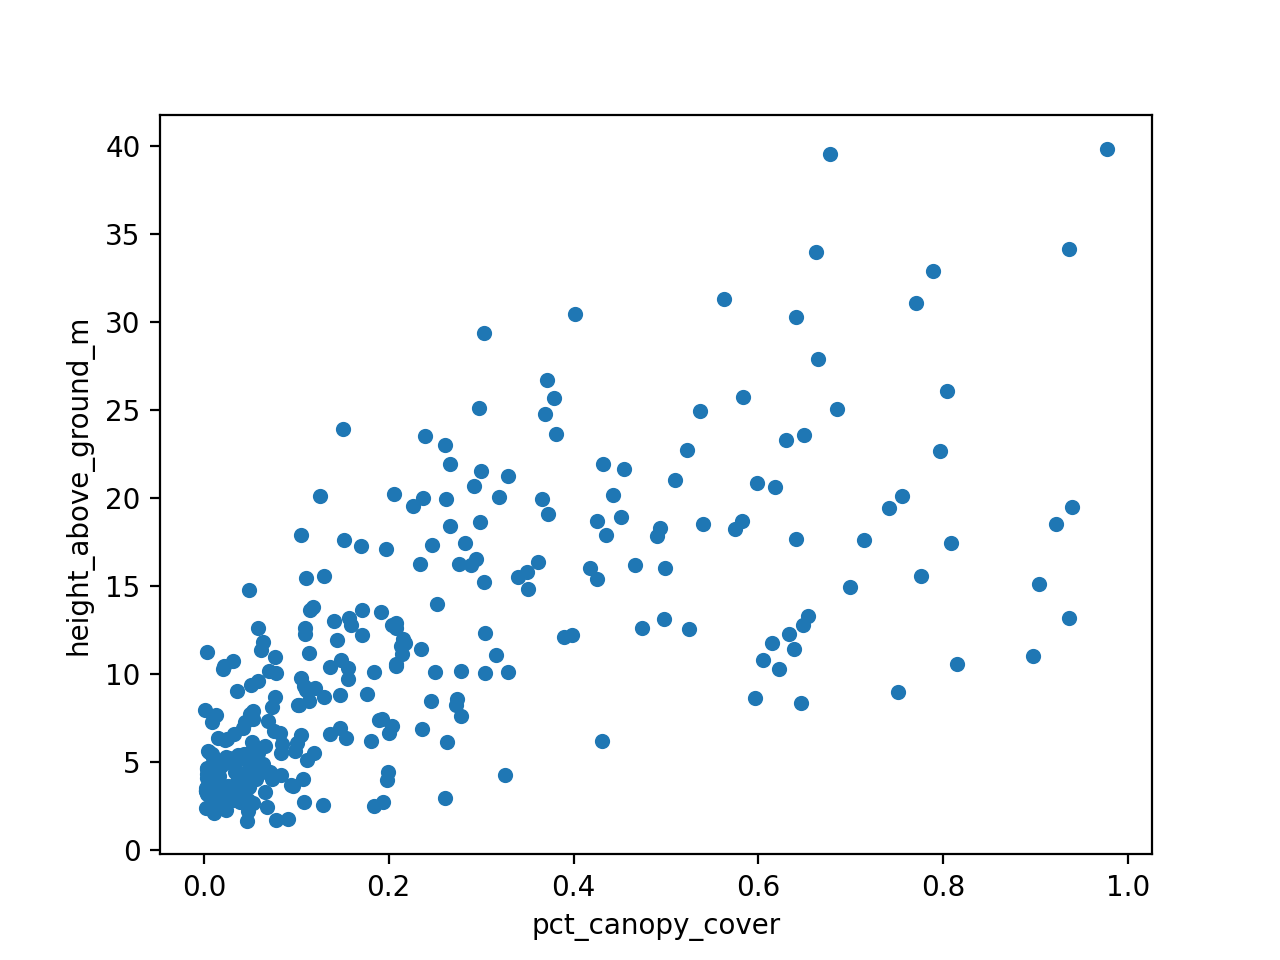

In [112]:
merged_inner_df[merged_inner_df['Neighborhood'] == 'Quinnipiac Meadows'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

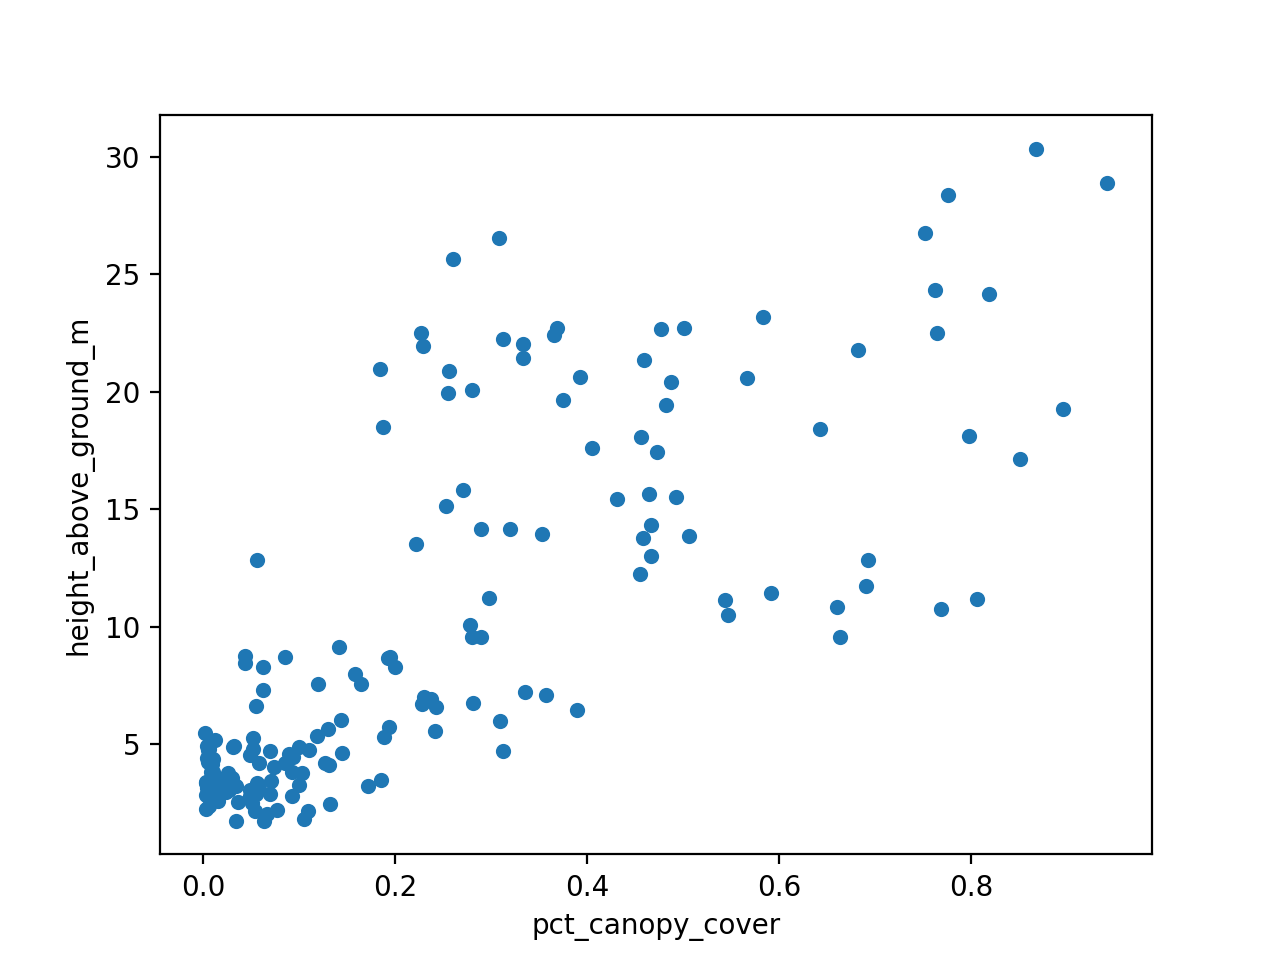

In [113]:
merged_inner_df[merged_inner_df['Neighborhood'] == 'Fair Haven Heights'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

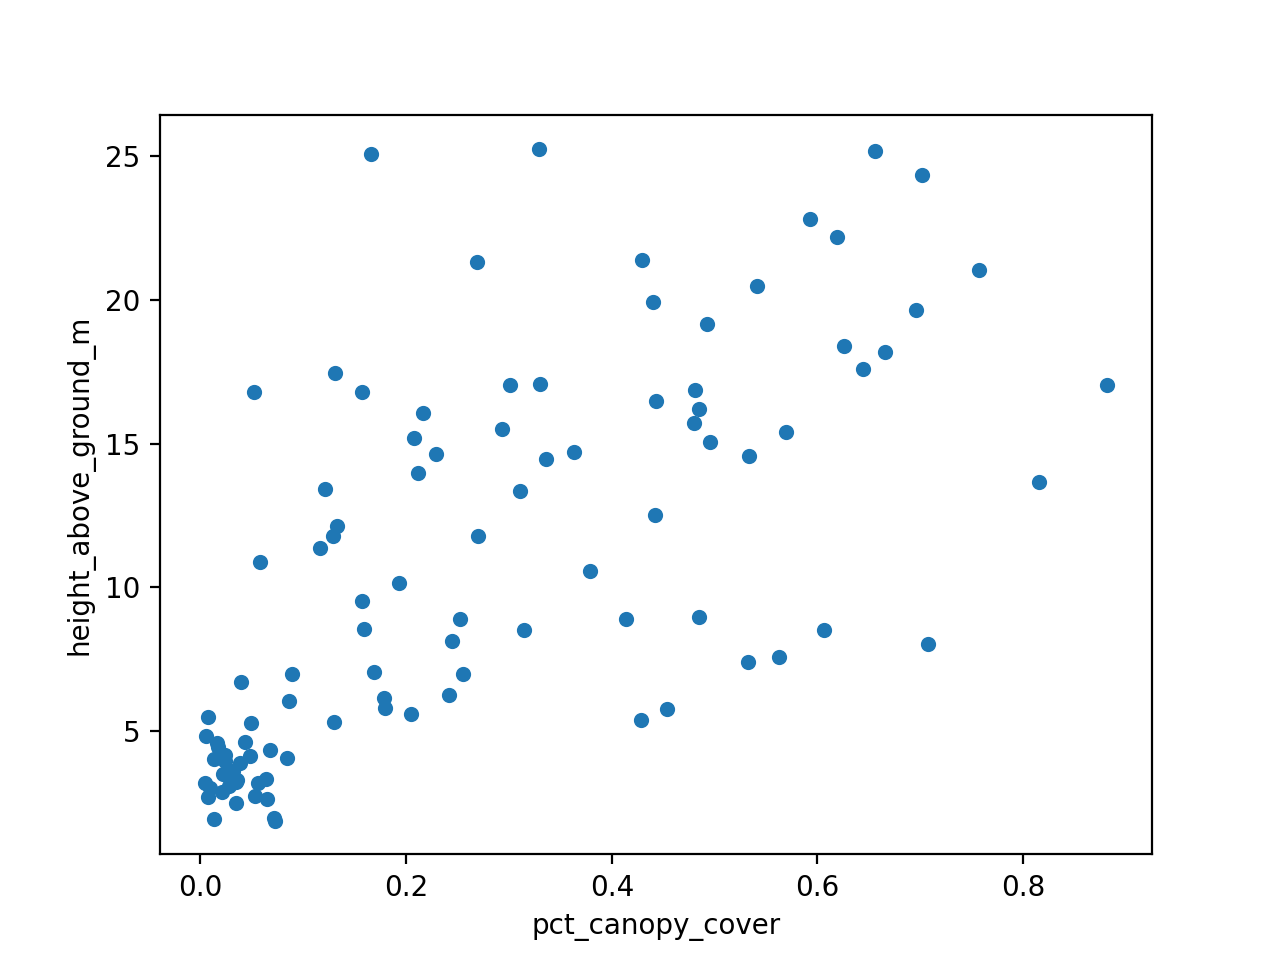

In [114]:
# east of bridge, includes port
merged_inner_df[merged_inner_df['Neighborhood'] == 'Annex'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

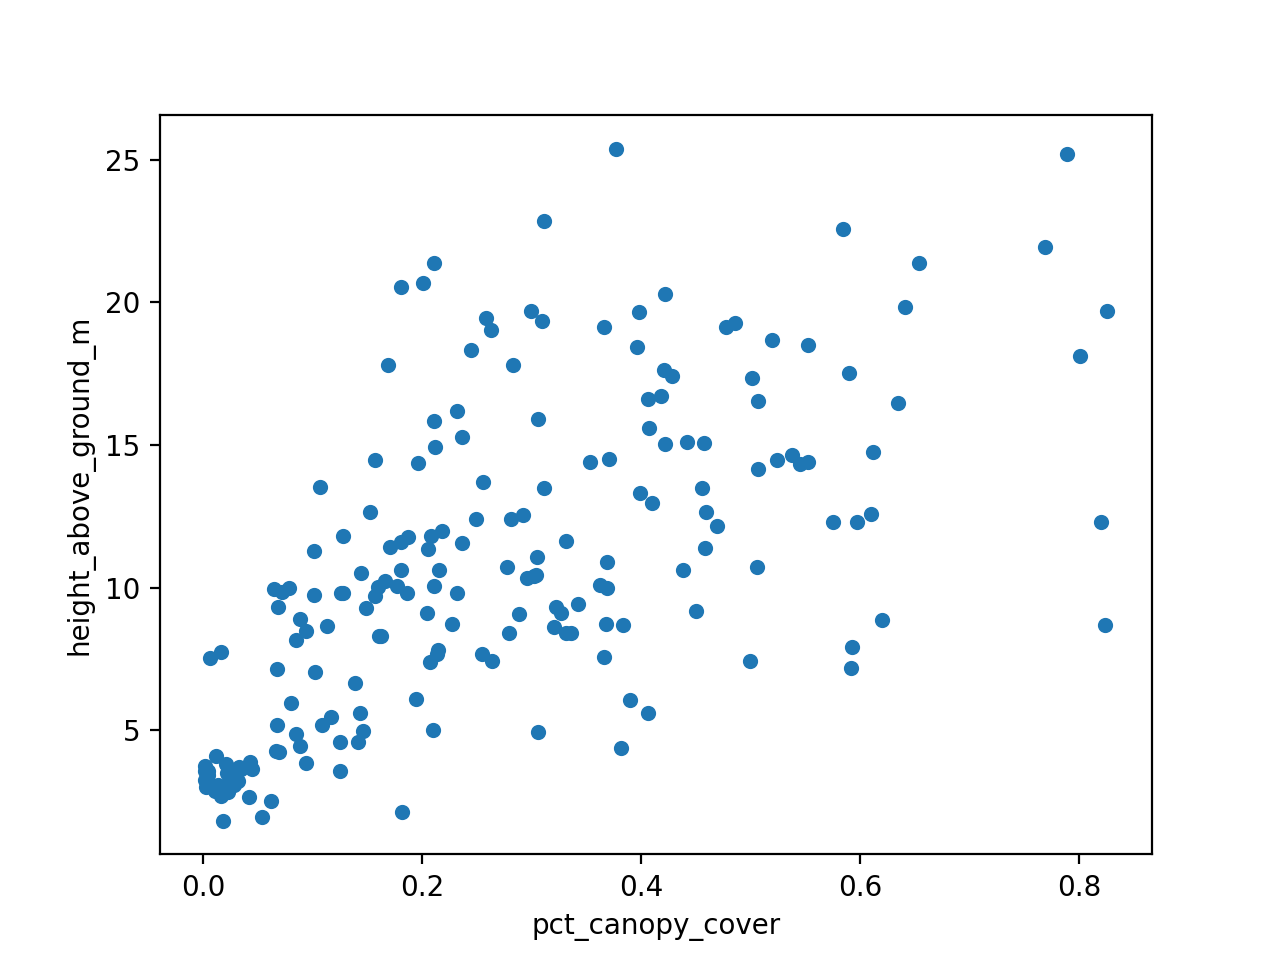

In [115]:
merged_inner_df[merged_inner_df['Neighborhood'] == 'Fair Haven'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

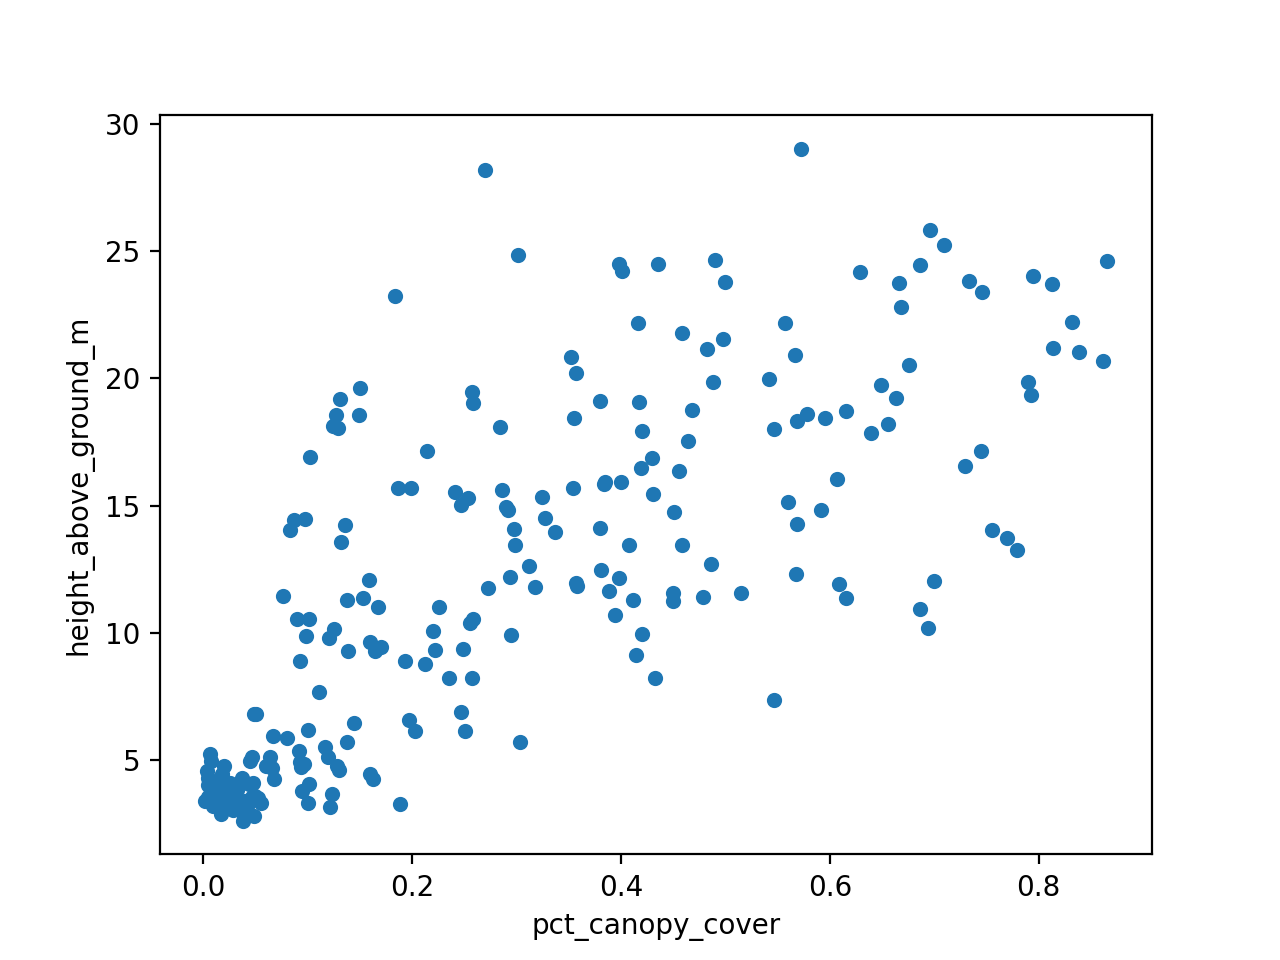

In [116]:
merged_inner_df[merged_inner_df['Neighborhood'] == 'West River'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

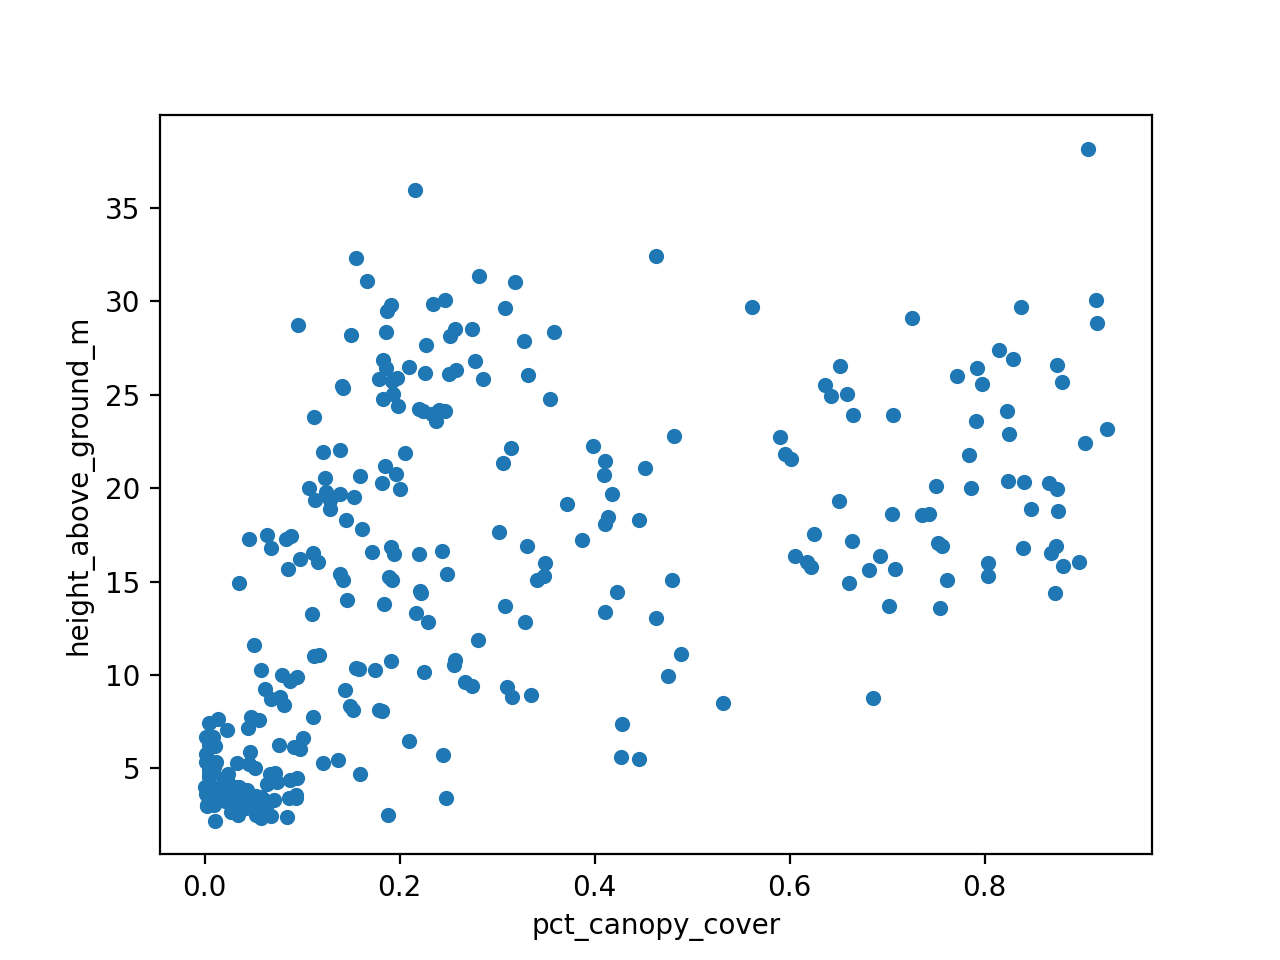

In [128]:
# includes SCSU, mostly forested land in state park
merged_inner_df[merged_inner_df['Neighborhood'] == 'West Rock'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

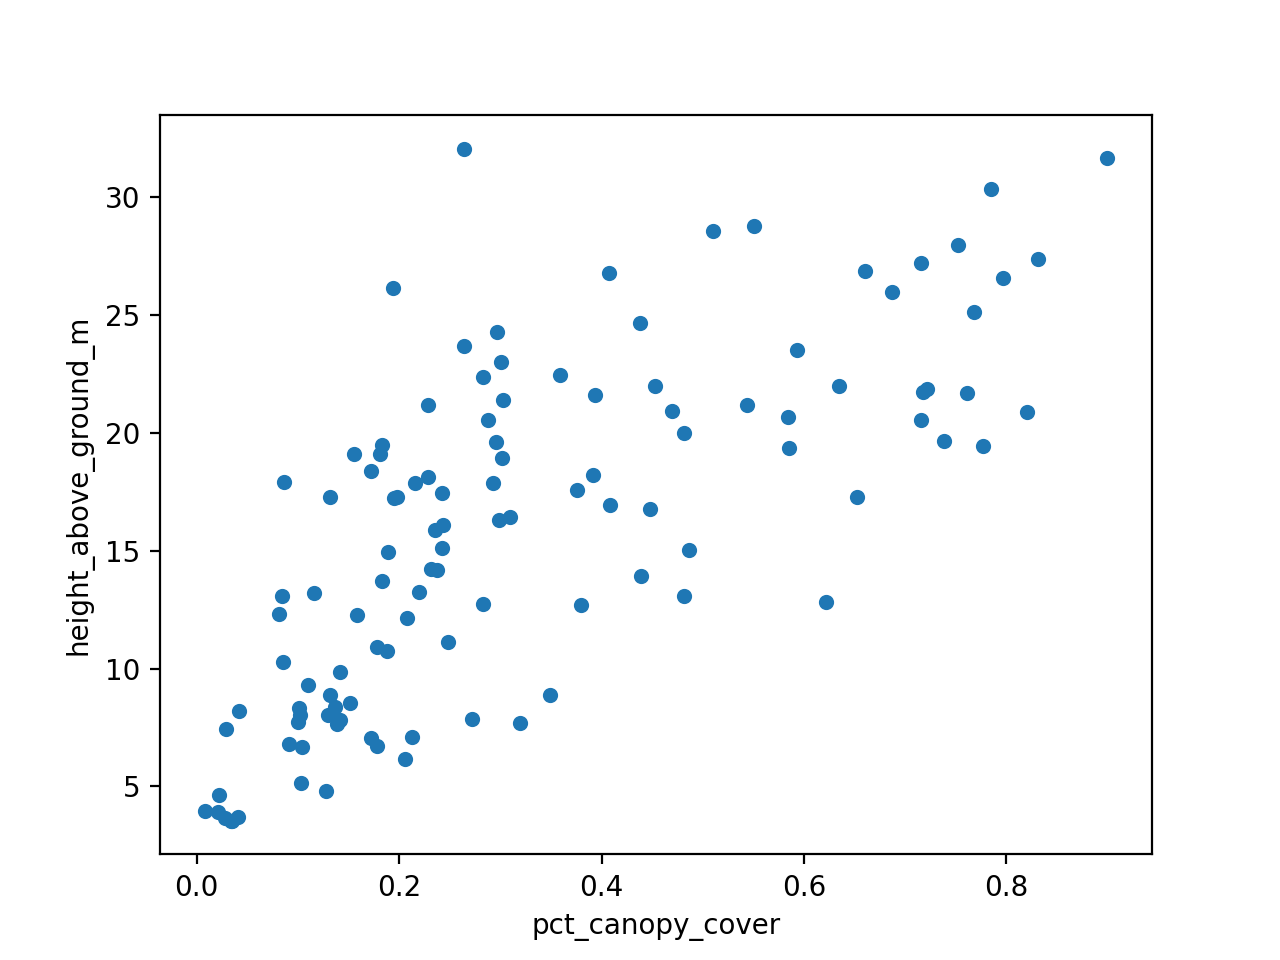

In [127]:
# low density residential, north of golf course, adjacent to forest
merged_inner_df[merged_inner_df['Neighborhood'] == 'Amity'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

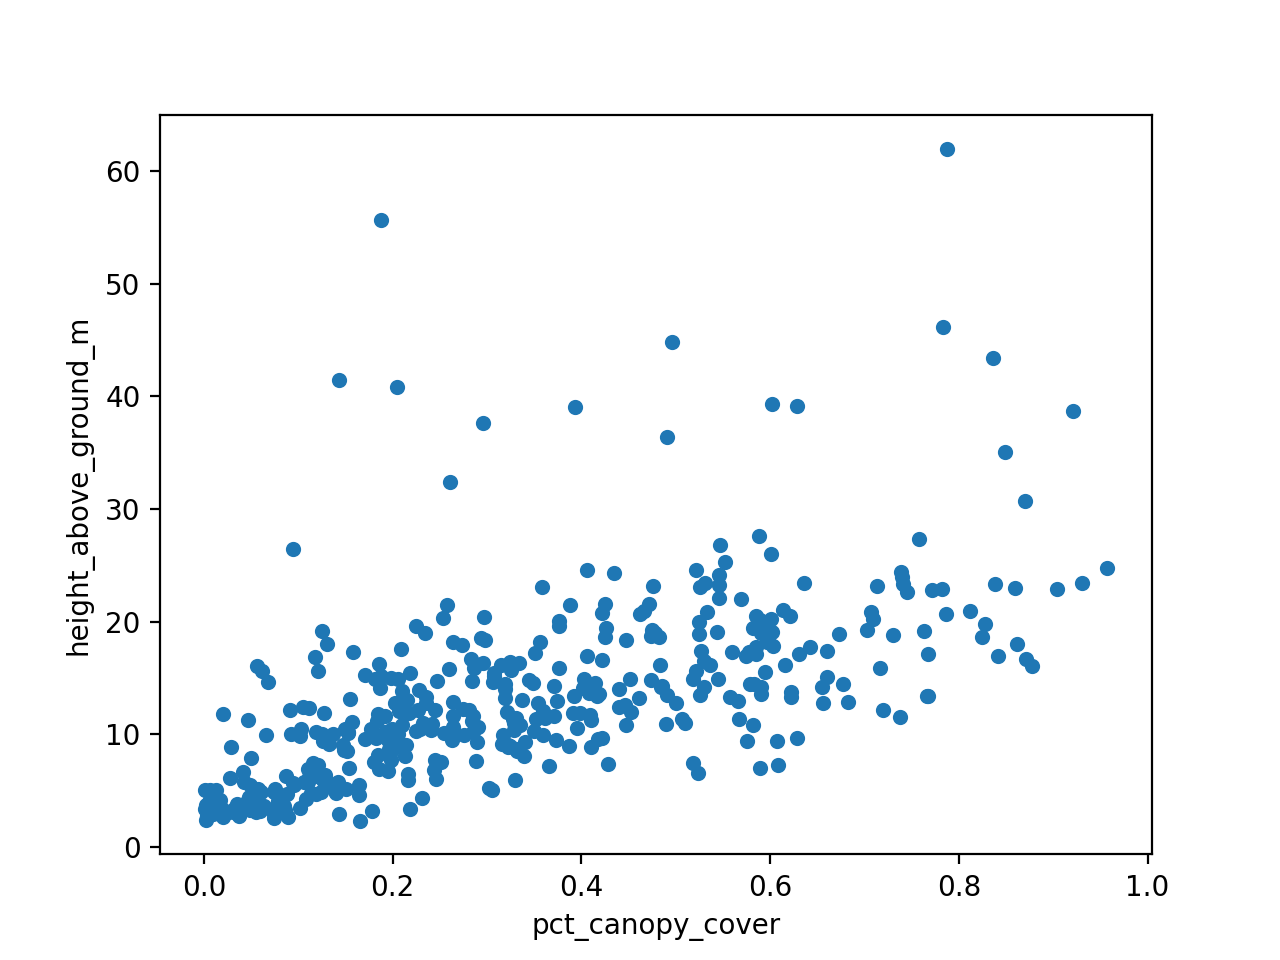

In [126]:
# South of Frontage Rd, includes YSM, lots of commercial properties
merged_inner_df[merged_inner_df['Neighborhood'] == 'Hill'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

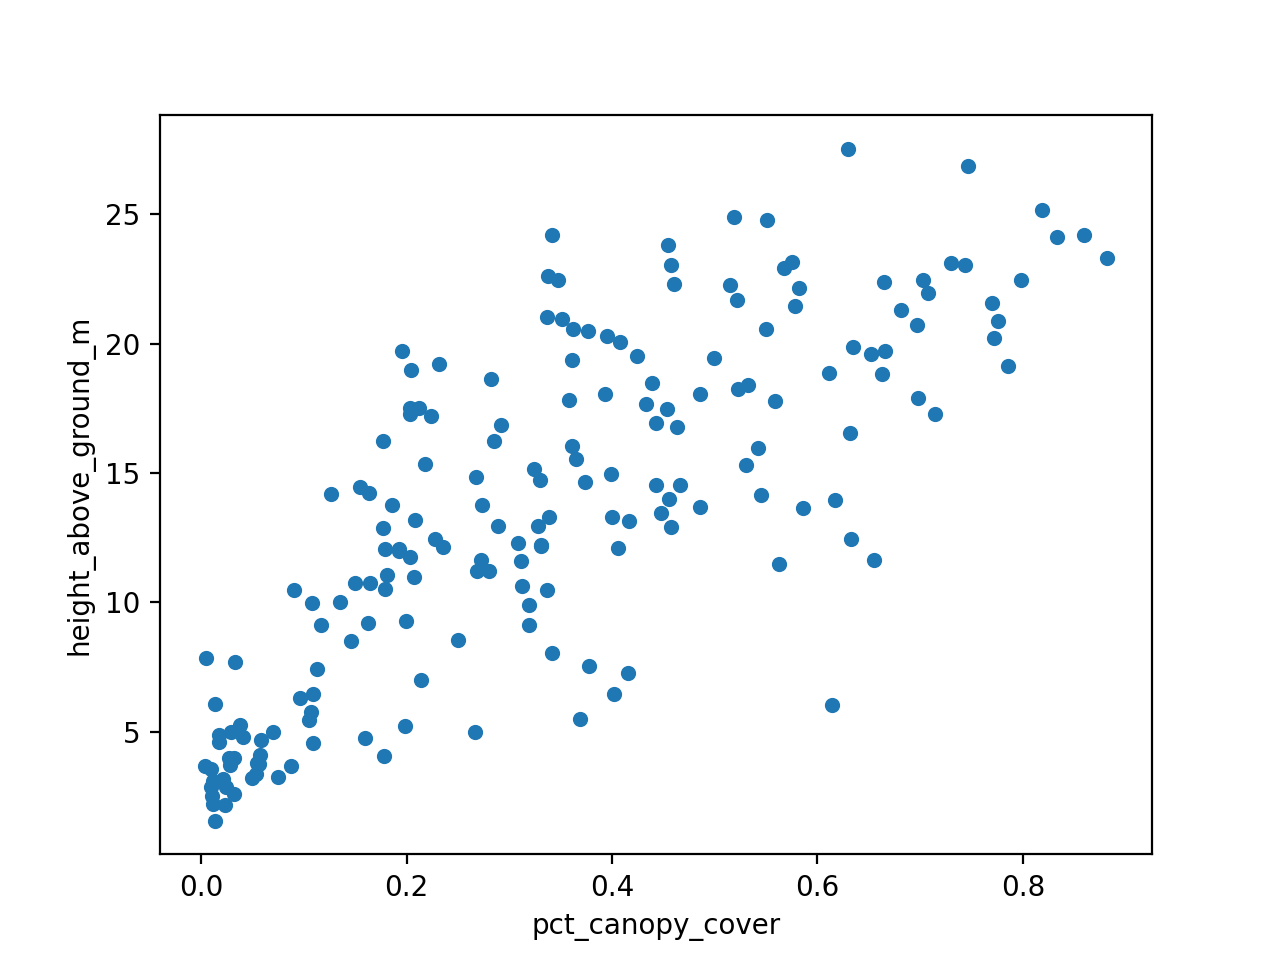

In [125]:
merged_inner_df[merged_inner_df['Neighborhood'] == 'Newhallville'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

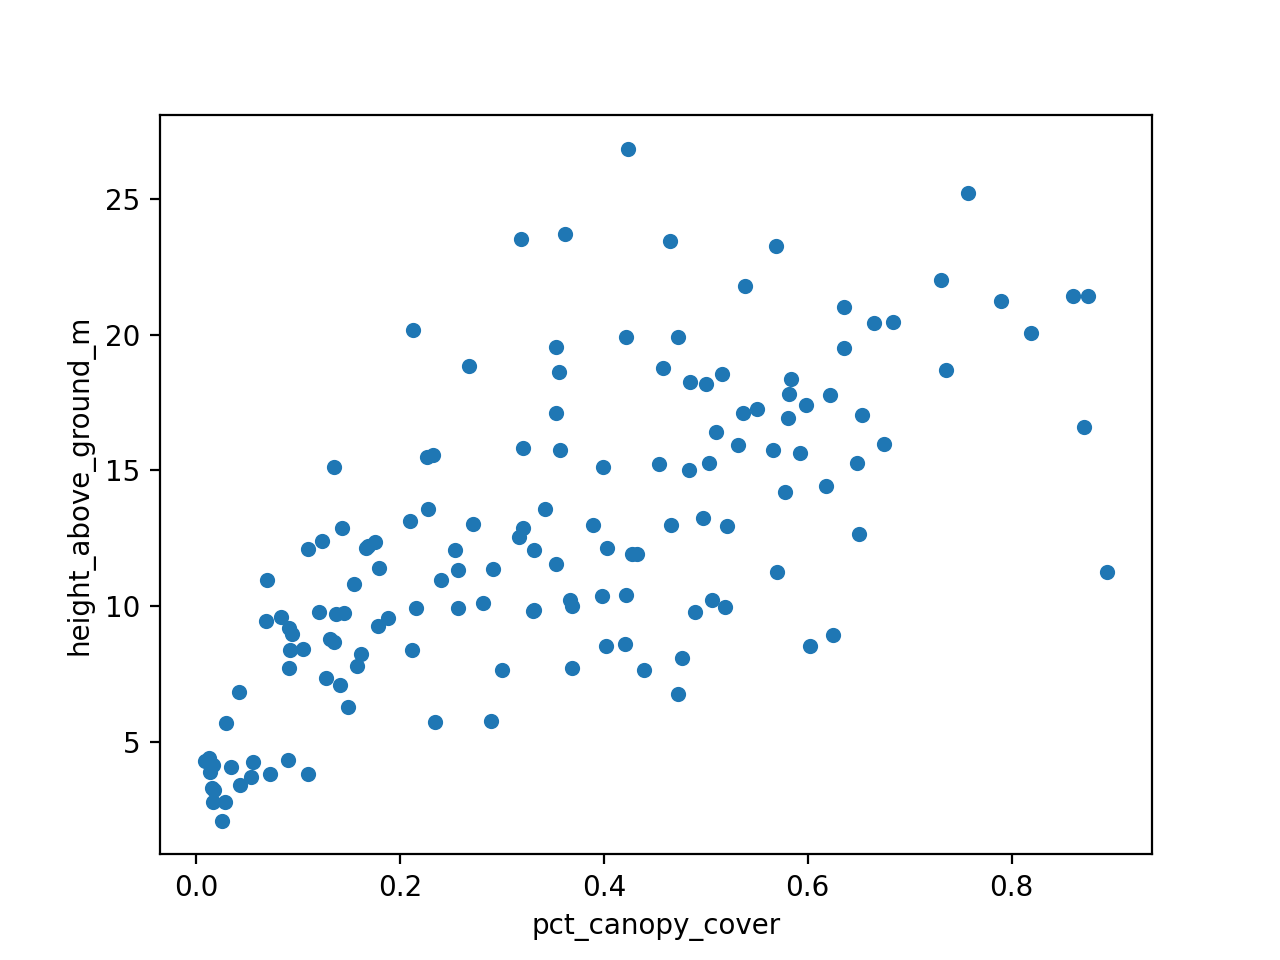

In [124]:
merged_inner_df[merged_inner_df['Neighborhood'] == 'Dixwell'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

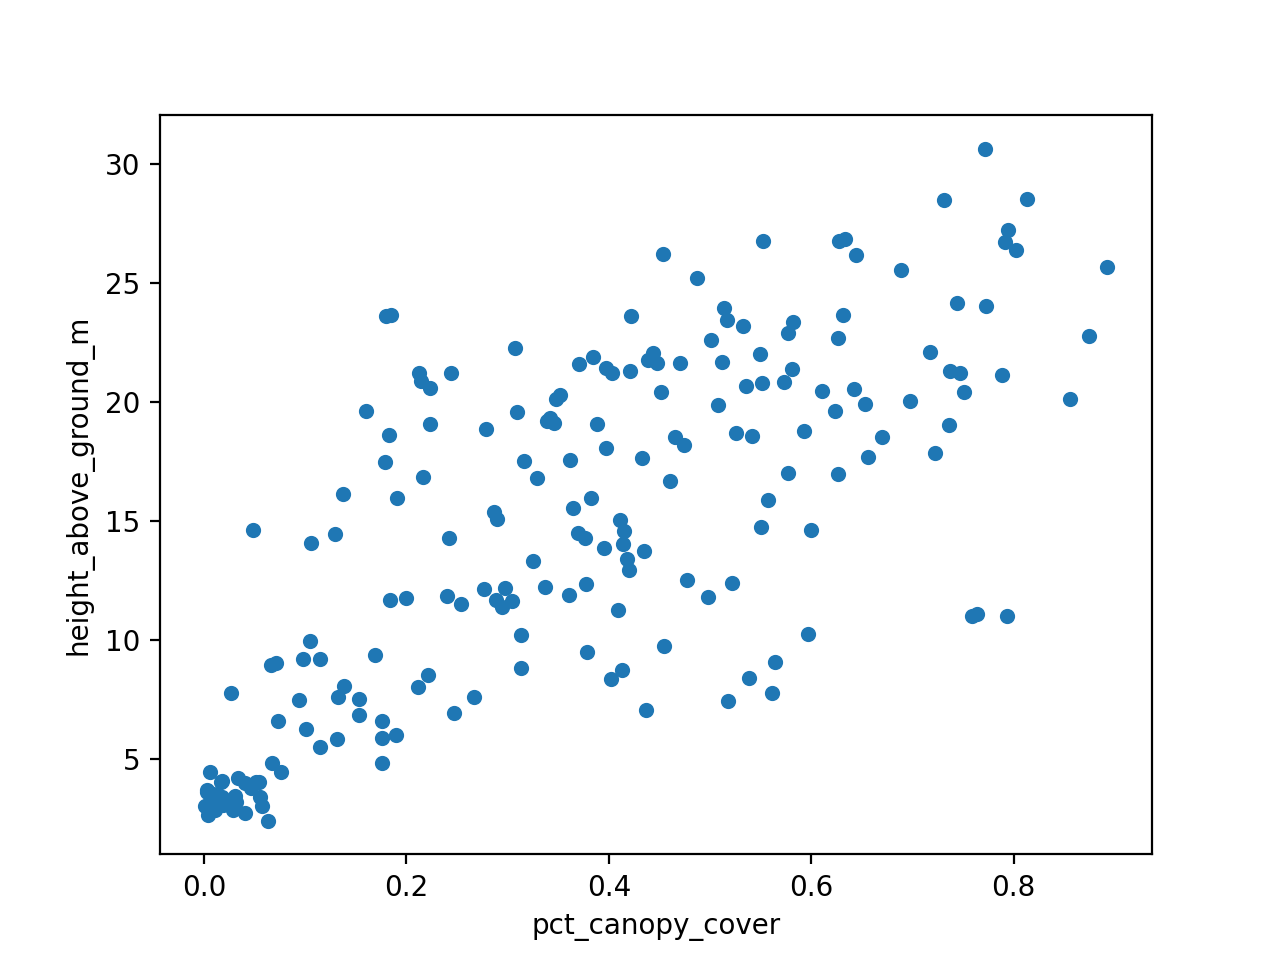

In [123]:
# lots of low density single family homes, SCSU and nearby parks
merged_inner_df[merged_inner_df['Neighborhood'] == 'Beaver Hills'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

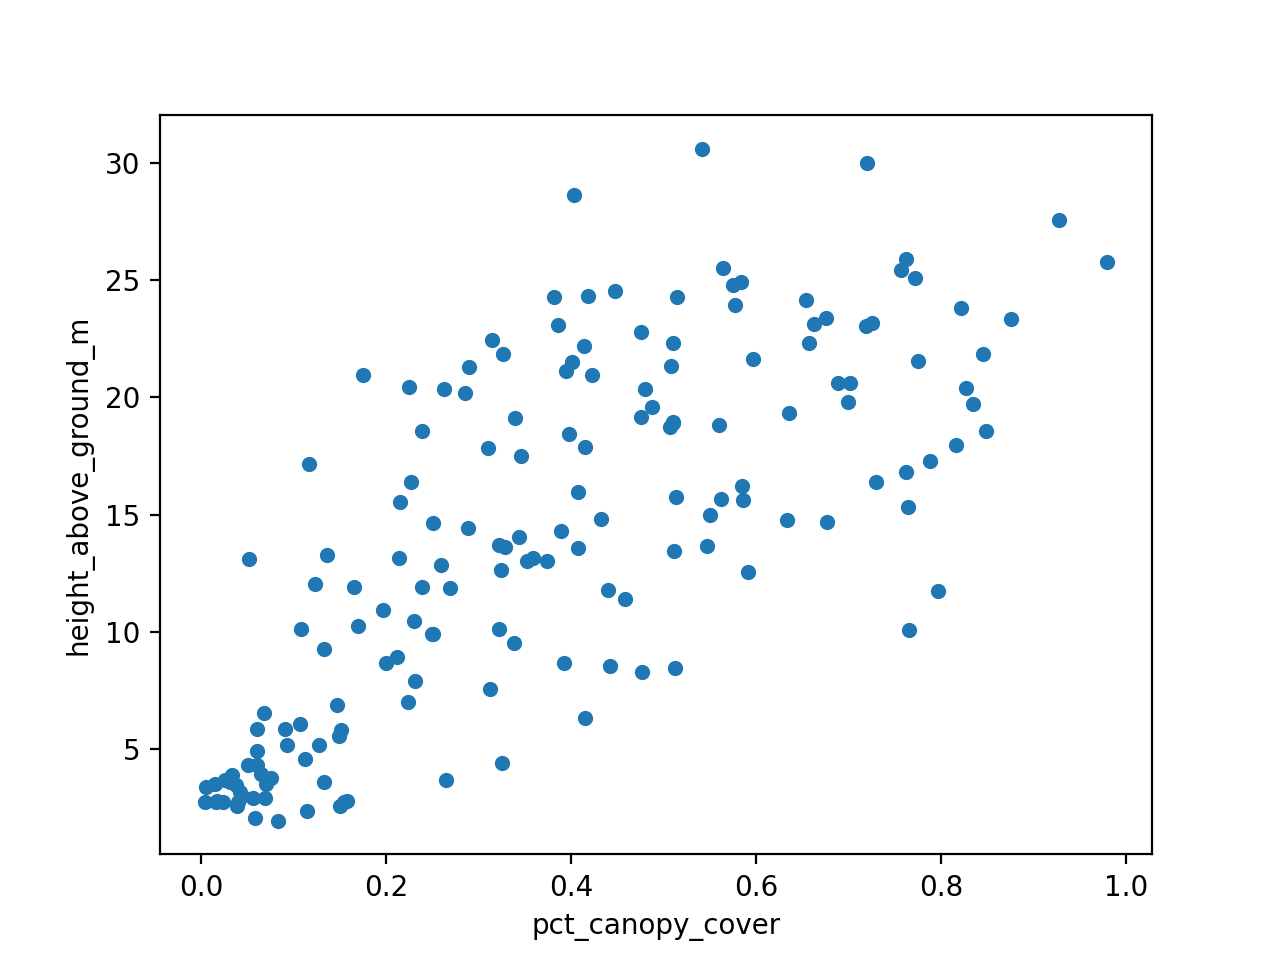

In [122]:
# West of East Rock, includes Yale Divinity and several schools and parks
merged_inner_df[merged_inner_df['Neighborhood'] == 'Prospect Hill'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

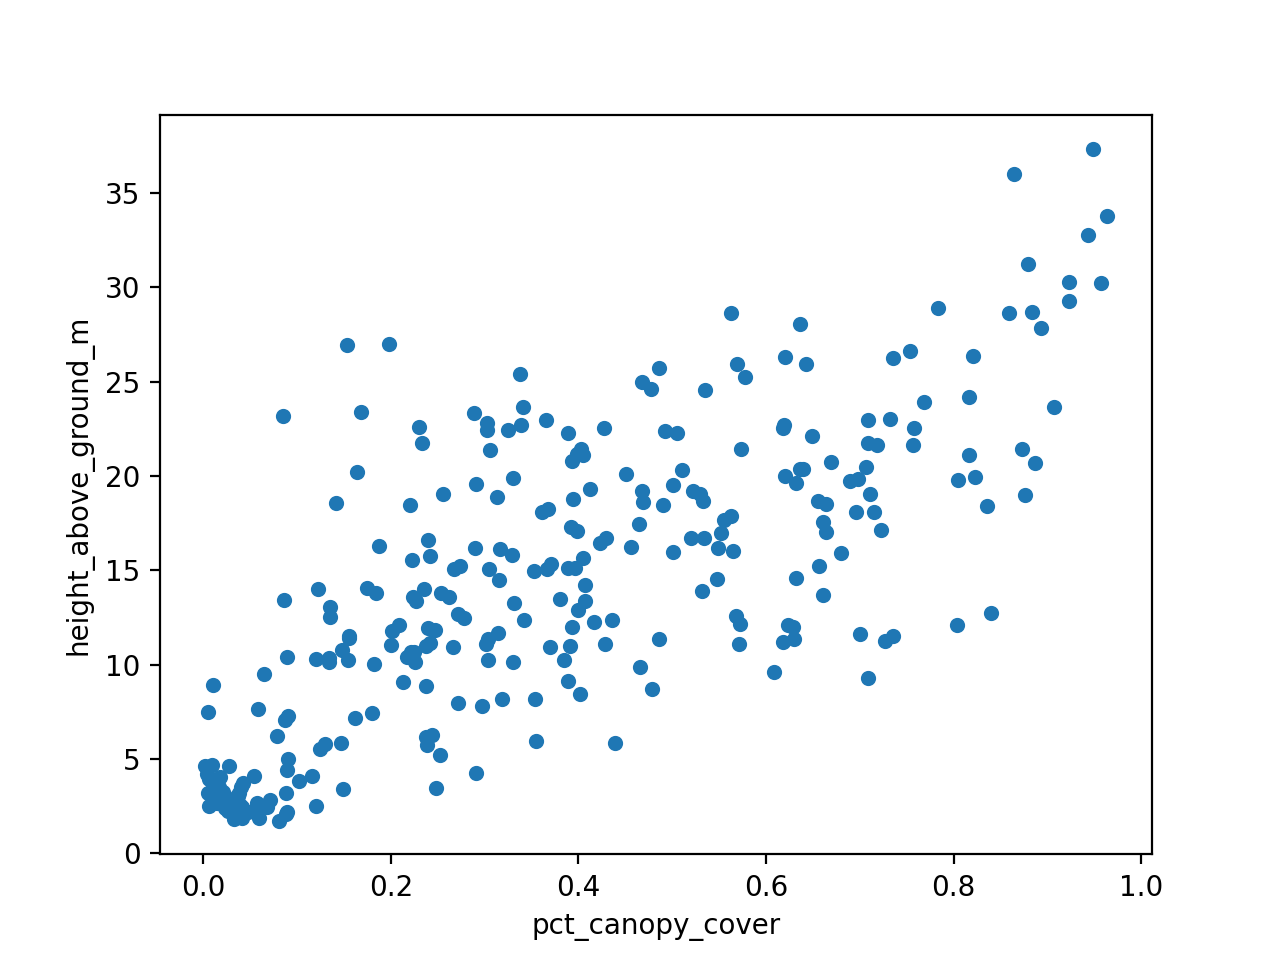

In [121]:
merged_inner_df[merged_inner_df['Neighborhood'] == 'East Rock'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

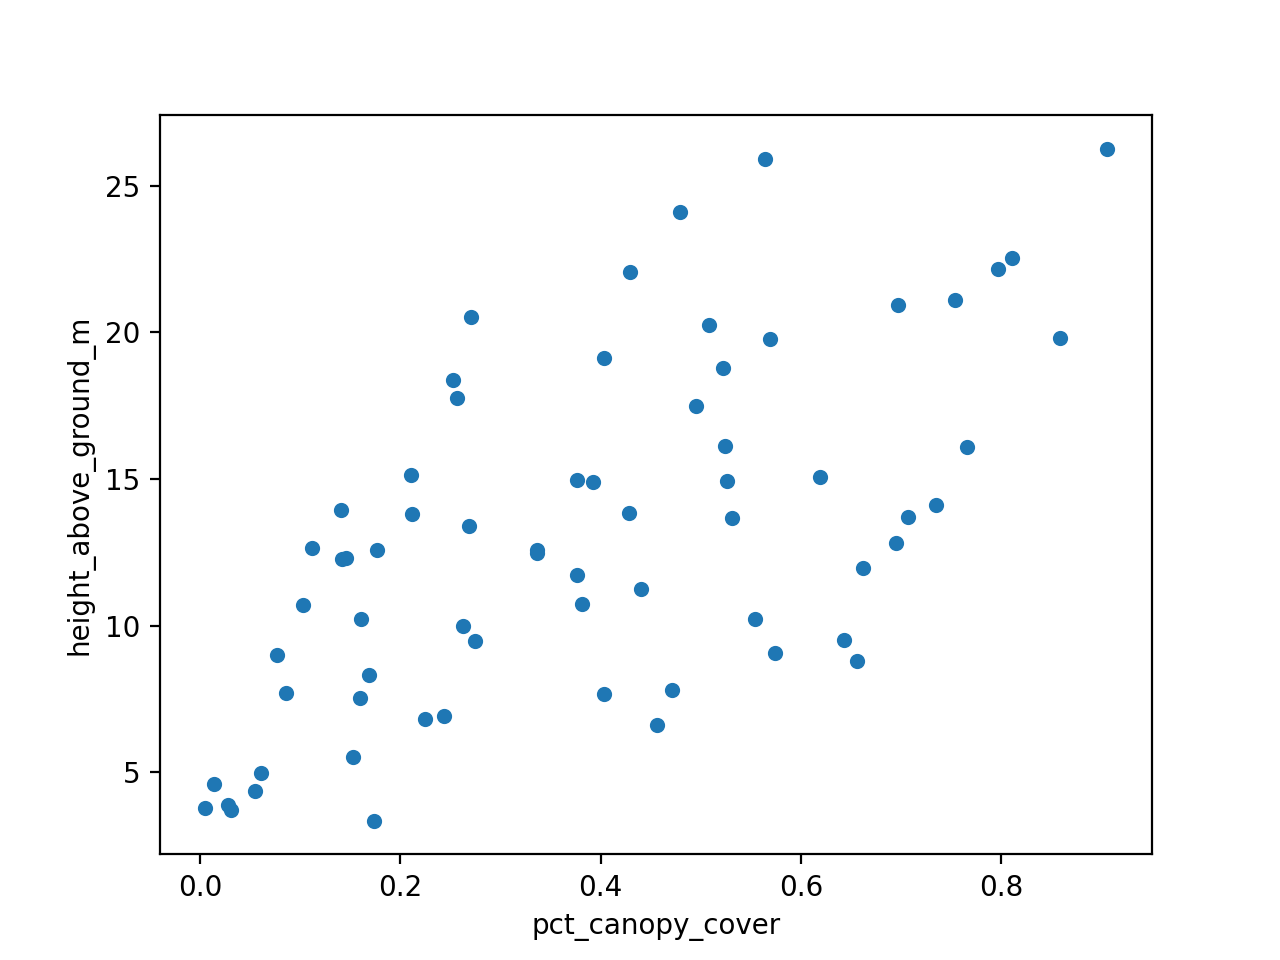

In [120]:
# Areas between Chapel and Whalley, west of Park St
merged_inner_df[merged_inner_df['Neighborhood'] == 'Dwight'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

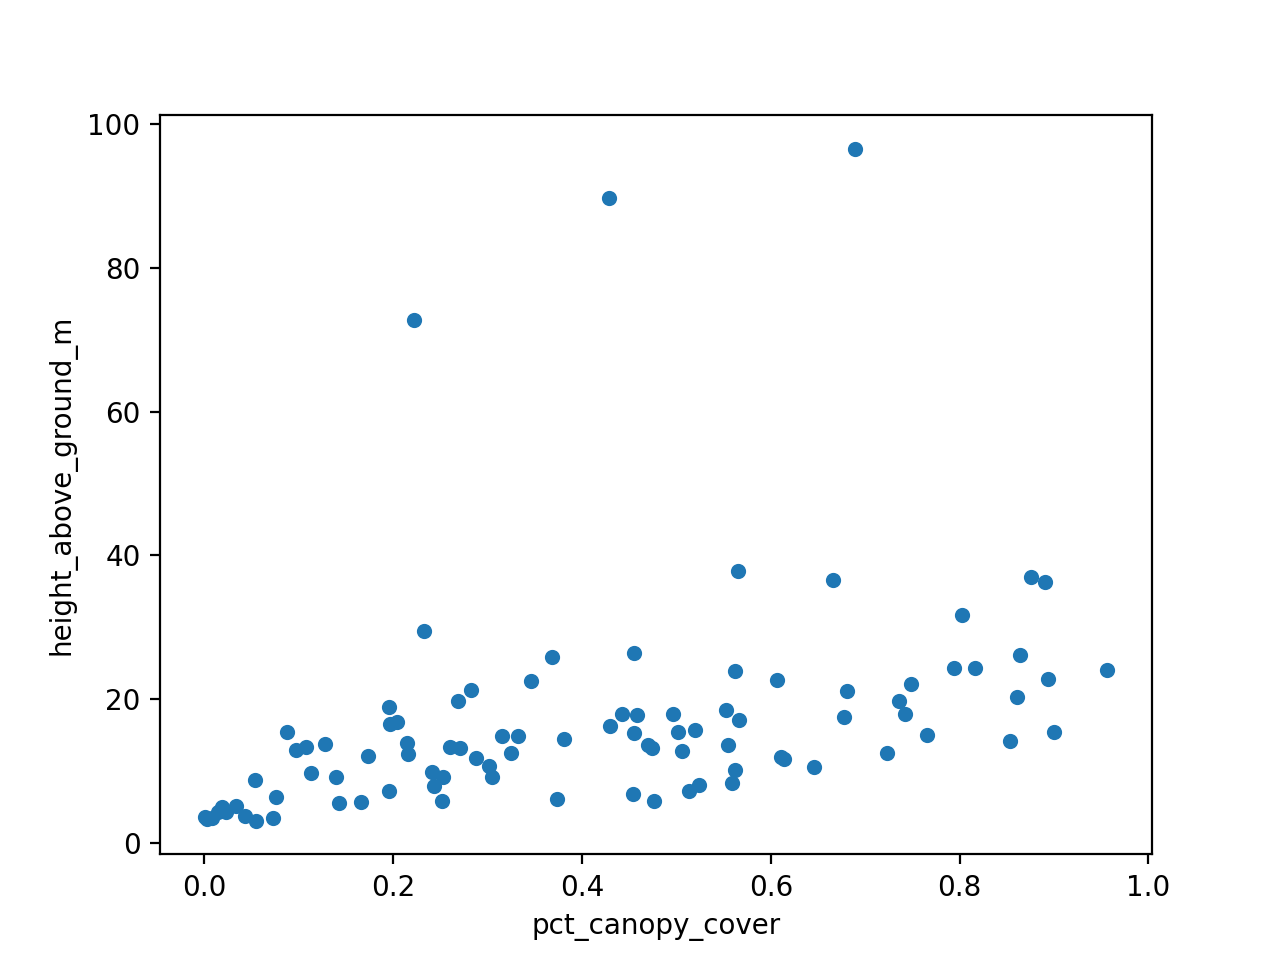

In [119]:
merged_inner_df[merged_inner_df['Neighborhood'] == 'Downtown'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

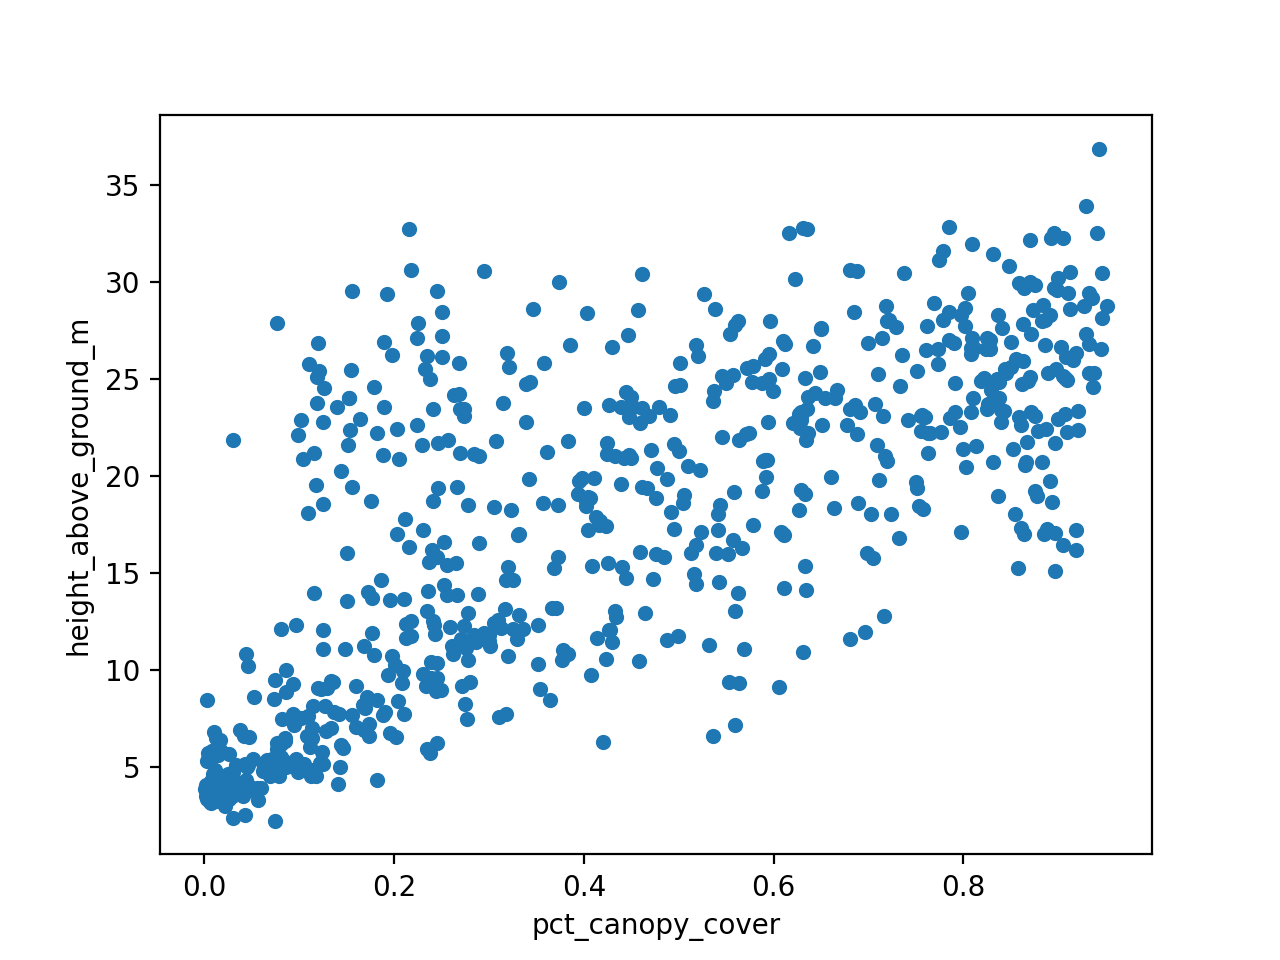

In [118]:
# Westville includes the forested land surrounding the Yale golf course
merged_inner_df[merged_inner_df['Neighborhood'] == 'Westville'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

<Axes: xlabel='pct_canopy_cover', ylabel='height_above_ground_m'>

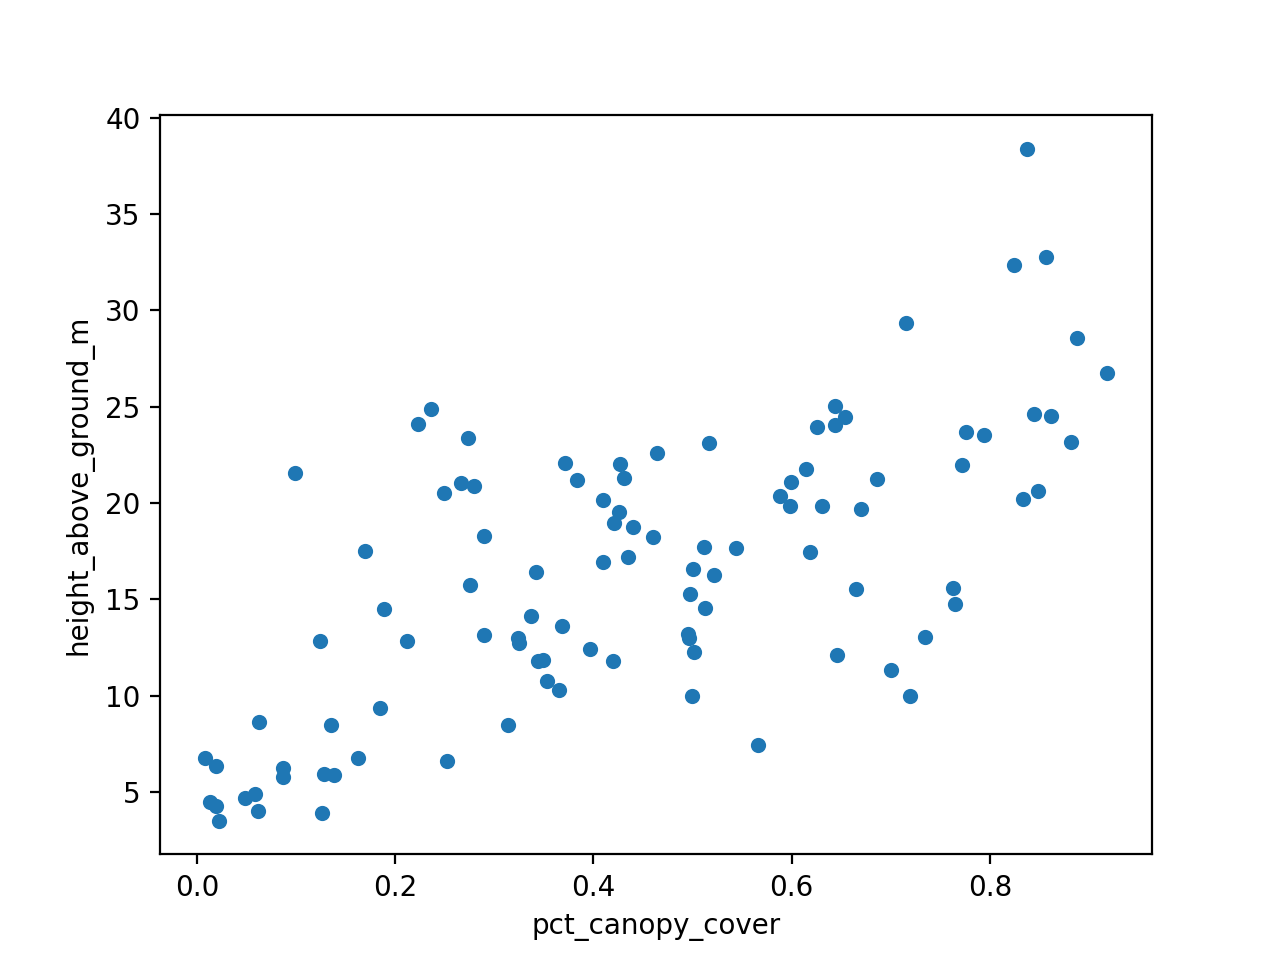

In [117]:
# Edgewood is mostly low density single family structures adjacent to Edgewood Park
merged_inner_df[merged_inner_df['Neighborhood'] == 'Edgewood'].plot.scatter(x='pct_canopy_cover',y = 'height_above_ground_m')

In [130]:
merged_inner_df.head()

latitude  longitude  algorithmrun_flag  pct_canopy_cover  \
2415  41.288566 -72.895731                  1          0.015877   
2416  41.288870 -72.895182                  1          0.021565   
2417  41.289176 -72.894630                  1          0.004627   
2418  41.289478 -72.894083                  1          0.028282   
2419  41.289774 -72.893545                  1          0.644540   

      l2b_quality_flag  height_above_ground_m  landsat_treecover  \
2415                 0                   4.59               18.0   
2416                 0                   3.53               39.0   
2417                 0                   3.21                0.0   
2418                 0                   3.09                0.0   
2419                 0                  17.59                0.0   

      urban_proportion                uid                          geometry  \
2415                43  85140000200273528  POINT (-8114715.709 5054998.761)   
2416                55  85140000200273529  POINT (-8114654.546 5055043.788)   
2417                73  85140000200273530  POINT (-8114593.064 5055089.128)   
2418                84  85140000200273531  POINT (-8114532.240 5055133.798)   
2419                67  85140000200273532  POINT (-8114472.267 5055177.608)   

      index_right   ACRES Neighborhood  
2415           16  877.07        Annex  
2416           16  877.07        Annex  
2417           16  877.07        Annex  
2418           16  877.07        Annex  
2419           16  877.07        Annex

In [106]:
grouped_df_cpc = merged_inner_df.groupby('Neighborhood').agg(avg_canopy_cover=('pct_canopy_cover','mean')).reset_index()

In [108]:
grouped_df_cpc.sort_values('avg_canopy_cover')

Neighborhood  avg_canopy_cover
11          Long Wharf          0.134790
14  Quinnipiac Meadows          0.219754
9   Fair Haven Heights          0.246671
1                Annex          0.260512
8           Fair Haven          0.266916
15          West River          0.281332
16           West Rock          0.285242
0                Amity          0.323964
10                Hill          0.327632
12        Newhallville          0.339259
3              Dixwell          0.349652
2         Beaver Hills          0.361109
13       Prospect Hill          0.373814
6            East Rock          0.374629
5               Dwight          0.385870
4             Downtown          0.410394
17           Westville          0.418905
7             Edgewood          0.440329

In [141]:
# Join geometry column for mapping
geo_avg_canopy_cover = grouped_df_cpc.merge(nei_pre_merge, how='left', on='Neighborhood', indicator=True, validate='1:1')
geo_avg_canopy_cover

Neighborhood  avg_canopy_cover    ACRES  \
0                Amity          0.323964   470.91   
1                Annex          0.260512   877.07   
2         Beaver Hills          0.361109   442.60   
3              Dixwell          0.349652   336.78   
4             Downtown          0.410394   302.08   
5               Dwight          0.385870   202.58   
6            East Rock          0.374629   714.54   
7             Edgewood          0.440329   237.69   
8           Fair Haven          0.266916   635.72   
9   Fair Haven Heights          0.246671   735.32   
10                Hill          0.327632   906.48   
11          Long Wharf          0.134790   532.80   
12        Newhallville          0.339259   404.97   
13       Prospect Hill          0.373814   415.56   
14  Quinnipiac Meadows          0.219754   907.27   
15          West River          0.281332   430.35   
16           West Rock          0.285242   773.41   
17           Westville          0.418905  1461.13   

                                             geometry _merge  
0   POLYGON ((-8122986.721 5062944.439, -8122936.3...   both  
1   POLYGON ((-8114363.662 5056907.349, -8114323.9...   both  
2   POLYGON ((-8120010.855 5062053.576, -8119990.1...   both  
3   POLYGON ((-8119801.427 5059109.589, -8119911.5...   both  
4   POLYGON ((-8118173.770 5058949.906, -8118143.2...   both  
5   POLYGON ((-8119801.427 5059109.589, -8119667.0...   both  
6   POLYGON ((-8116600.337 5061557.286, -8116597.6...   both  
7   POLYGON ((-8119911.510 5059160.851, -8119977.4...   both  
8   POLYGON ((-8115322.615 5059153.789, -8115294.4...   both  
9   POLYGON ((-8113555.576 5060015.669, -8113546.0...   both  
10  POLYGON ((-8119374.785 5057594.736, -8119366.7...   both  
11  POLYGON ((-8116385.048 5057016.185, -8116353.3...   both  
12  POLYGON ((-8119597.914 5062001.929, -8119528.5...   both  
13  POLYGON ((-8117948.803 5061795.287, -8117891.8...   both  
14  POLYGON ((-8111277.479 5061962.042, -8111250.5...   both  
15  POLYGON ((-8121478.852 5058767.818, -8120982.4...   both  
16  POLYGON ((-8121436.041 5064168.871, -8121374.6...   both  
17  POLYGON ((-8124874.872 5061288.566, -8124864.1...   both

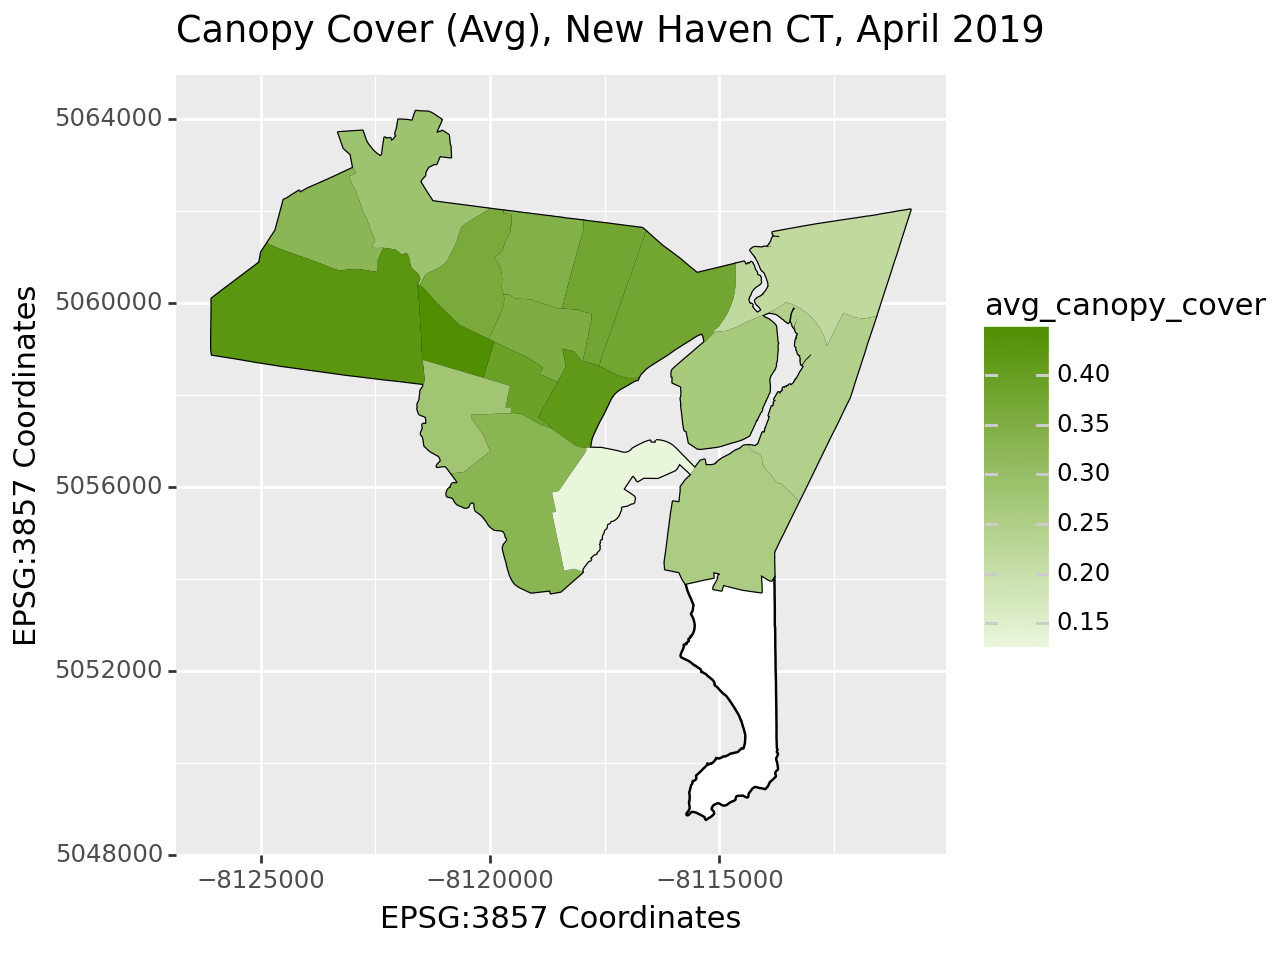

<Figure Size: (640 x 480)>

In [143]:
# check graph of avg_canopy_cover by neighborhood
(
  ggplot()
   + geom_map(nei_pre_merge, fill = 'white', color = 'black')
   + geom_map(geo_avg_canopy_cover, aes(geometry='geometry', fill="avg_canopy_cover"),color=None)
   + scale_fill_gradient(low="#eaf6db", high="#518f02")
   + xlab("EPSG:3857 Coordinates")
   + ylab("EPSG:3857 Coordinates")
   + ggtitle("Canopy Cover (Avg), New Haven CT, April 2019")
)

In [100]:
grouped_df_avghag = merged_inner_df.groupby('Neighborhood').agg(avg_height_above_ground_m=('height_above_ground_m','mean')).reset_index()

In [104]:
grouped_df_avghag.sort_values('avg_height_above_ground_m')

Neighborhood  avg_height_above_ground_m
11          Long Wharf                   5.794662
9   Fair Haven Heights                   9.942242
1                Annex                  10.439612
8           Fair Haven                  10.595333
14  Quinnipiac Meadows                  10.678449
15          West River                  11.665714
3              Dixwell                  12.510479
5               Dwight                  13.048507
10                Hill                  13.086000
12        Newhallville                  13.576000
13       Prospect Hill                  13.987455
6            East Rock                  14.254236
2         Beaver Hills                  14.531850
16           West Rock                  14.796645
0                Amity                  15.974737
7             Edgewood                  16.362277
17           Westville                  17.051606
4             Downtown                  17.069255

In [144]:
# Join geometry column for mapping
geo_avghag = grouped_df_avghag.merge(nei_pre_merge, how='left', on='Neighborhood', indicator=True, validate='1:1')
geo_avghag

Neighborhood  avg_height_above_ground_m    ACRES  \
0                Amity                  15.974737   470.91   
1                Annex                  10.439612   877.07   
2         Beaver Hills                  14.531850   442.60   
3              Dixwell                  12.510479   336.78   
4             Downtown                  17.069255   302.08   
5               Dwight                  13.048507   202.58   
6            East Rock                  14.254236   714.54   
7             Edgewood                  16.362277   237.69   
8           Fair Haven                  10.595333   635.72   
9   Fair Haven Heights                   9.942242   735.32   
10                Hill                  13.086000   906.48   
11          Long Wharf                   5.794662   532.80   
12        Newhallville                  13.576000   404.97   
13       Prospect Hill                  13.987455   415.56   
14  Quinnipiac Meadows                  10.678449   907.27   
15          West River                  11.665714   430.35   
16           West Rock                  14.796645   773.41   
17           Westville                  17.051606  1461.13   

                                             geometry _merge  
0   POLYGON ((-8122986.721 5062944.439, -8122936.3...   both  
1   POLYGON ((-8114363.662 5056907.349, -8114323.9...   both  
2   POLYGON ((-8120010.855 5062053.576, -8119990.1...   both  
3   POLYGON ((-8119801.427 5059109.589, -8119911.5...   both  
4   POLYGON ((-8118173.770 5058949.906, -8118143.2...   both  
5   POLYGON ((-8119801.427 5059109.589, -8119667.0...   both  
6   POLYGON ((-8116600.337 5061557.286, -8116597.6...   both  
7   POLYGON ((-8119911.510 5059160.851, -8119977.4...   both  
8   POLYGON ((-8115322.615 5059153.789, -8115294.4...   both  
9   POLYGON ((-8113555.576 5060015.669, -8113546.0...   both  
10  POLYGON ((-8119374.785 5057594.736, -8119366.7...   both  
11  POLYGON ((-8116385.048 5057016.185, -8116353.3...   both  
12  POLYGON ((-8119597.914 5062001.929, -8119528.5...   both  
13  POLYGON ((-8117948.803 5061795.287, -8117891.8...   both  
14  POLYGON ((-8111277.479 5061962.042, -8111250.5...   both  
15  POLYGON ((-8121478.852 5058767.818, -8120982.4...   both  
16  POLYGON ((-8121436.041 5064168.871, -8121374.6...   both  
17  POLYGON ((-8124874.872 5061288.566, -8124864.1...   both

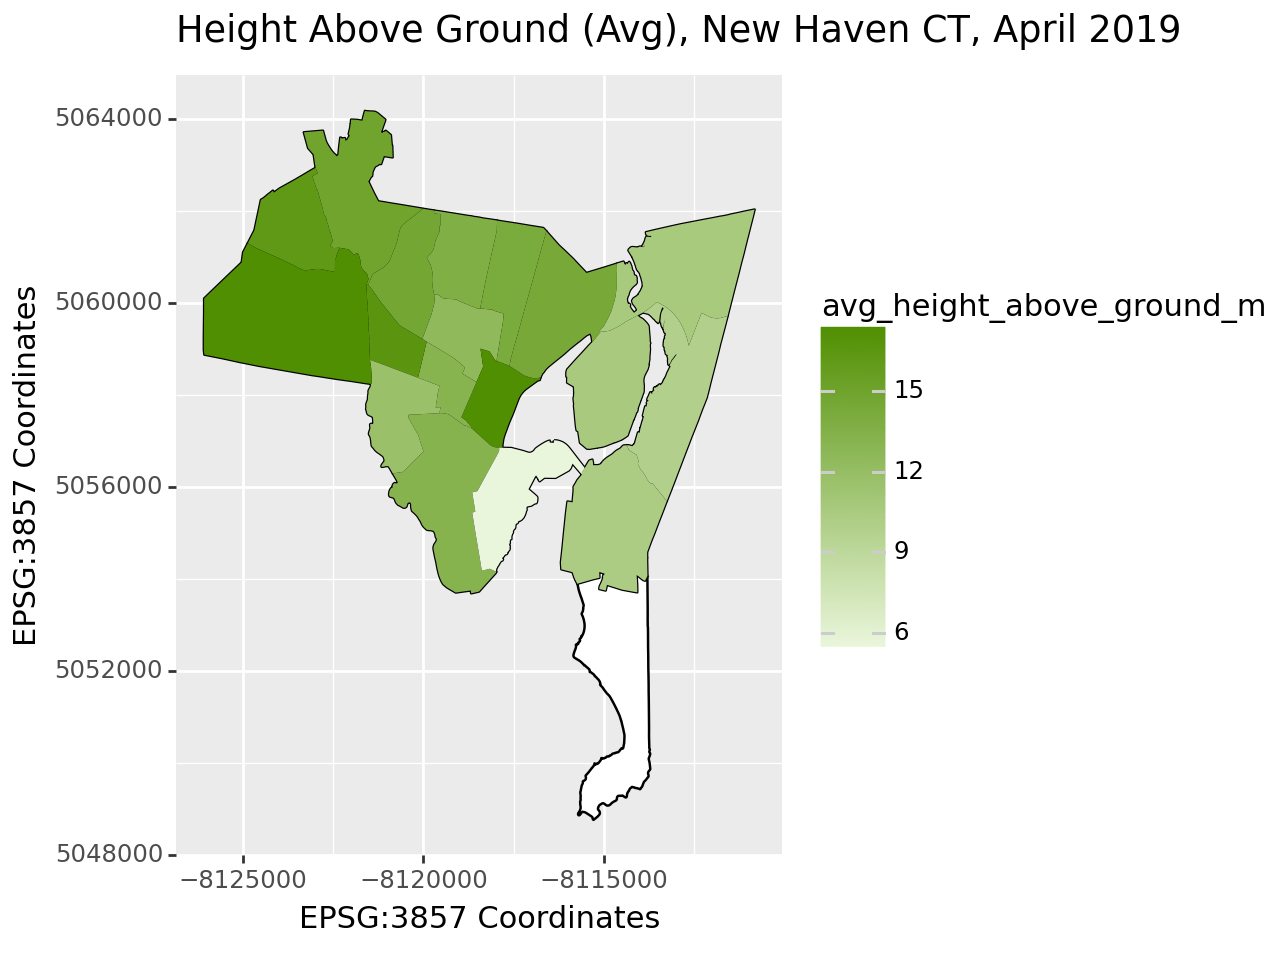

<Figure Size: (640 x 480)>

In [145]:
# check graph of avg height_above_ground_m by neighborhood
(
  ggplot()
   + geom_map(nei_pre_merge, fill = 'white', color = 'black')
   + geom_map(geo_avghag, aes(geometry='geometry', fill="avg_height_above_ground_m"),color=None)
   + scale_fill_gradient(low="#eaf6db", high="#518f02")
   + xlab("EPSG:3857 Coordinates")
   + ylab("EPSG:3857 Coordinates")
   + ggtitle("Height Above Ground (Avg), New Haven CT, April 2019")
)

In [134]:
# Note data was collected from landsat in 2010
grouped_df_landsat = merged_inner_df.groupby('Neighborhood').agg(avg_landsat_treecover_pct=('landsat_treecover','mean')).reset_index()

In [135]:
grouped_df_landsat.sort_values('avg_landsat_treecover_pct')

Neighborhood  avg_landsat_treecover_pct
11          Long Wharf                   0.114865
5               Dwight                   0.985075
10                Hill                   2.788636
8           Fair Haven                   2.805128
4             Downtown                   4.585106
3              Dixwell                   5.698630
1                Annex                  15.495146
12        Newhallville                  15.918919
15          West River                  19.600000
2         Beaver Hills                  20.745000
13       Prospect Hill                  21.400000
14  Quinnipiac Meadows                  21.674051
6            East Rock                  26.166667
7             Edgewood                  27.396040
0                Amity                  29.122807
9   Fair Haven Heights                  45.236364
17           Westville                  45.920391
16           West Rock                  56.953947

In [147]:
# Join geometry column for mapping
geo_avg_landsat = grouped_df_landsat.merge(nei_pre_merge, how='left', on='Neighborhood', indicator=True, validate='1:1')
geo_avg_landsat

Neighborhood  avg_landsat_treecover_pct    ACRES  \
0                Amity                  29.122807   470.91   
1                Annex                  15.495146   877.07   
2         Beaver Hills                  20.745000   442.60   
3              Dixwell                   5.698630   336.78   
4             Downtown                   4.585106   302.08   
5               Dwight                   0.985075   202.58   
6            East Rock                  26.166667   714.54   
7             Edgewood                  27.396040   237.69   
8           Fair Haven                   2.805128   635.72   
9   Fair Haven Heights                  45.236364   735.32   
10                Hill                   2.788636   906.48   
11          Long Wharf                   0.114865   532.80   
12        Newhallville                  15.918919   404.97   
13       Prospect Hill                  21.400000   415.56   
14  Quinnipiac Meadows                  21.674051   907.27   
15          West River                  19.600000   430.35   
16           West Rock                  56.953947   773.41   
17           Westville                  45.920391  1461.13   

                                             geometry _merge  
0   POLYGON ((-8122986.721 5062944.439, -8122936.3...   both  
1   POLYGON ((-8114363.662 5056907.349, -8114323.9...   both  
2   POLYGON ((-8120010.855 5062053.576, -8119990.1...   both  
3   POLYGON ((-8119801.427 5059109.589, -8119911.5...   both  
4   POLYGON ((-8118173.770 5058949.906, -8118143.2...   both  
5   POLYGON ((-8119801.427 5059109.589, -8119667.0...   both  
6   POLYGON ((-8116600.337 5061557.286, -8116597.6...   both  
7   POLYGON ((-8119911.510 5059160.851, -8119977.4...   both  
8   POLYGON ((-8115322.615 5059153.789, -8115294.4...   both  
9   POLYGON ((-8113555.576 5060015.669, -8113546.0...   both  
10  POLYGON ((-8119374.785 5057594.736, -8119366.7...   both  
11  POLYGON ((-8116385.048 5057016.185, -8116353.3...   both  
12  POLYGON ((-8119597.914 5062001.929, -8119528.5...   both  
13  POLYGON ((-8117948.803 5061795.287, -8117891.8...   both  
14  POLYGON ((-8111277.479 5061962.042, -8111250.5...   both  
15  POLYGON ((-8121478.852 5058767.818, -8120982.4...   both  
16  POLYGON ((-8121436.041 5064168.871, -8121374.6...   both  
17  POLYGON ((-8124874.872 5061288.566, -8124864.1...   both

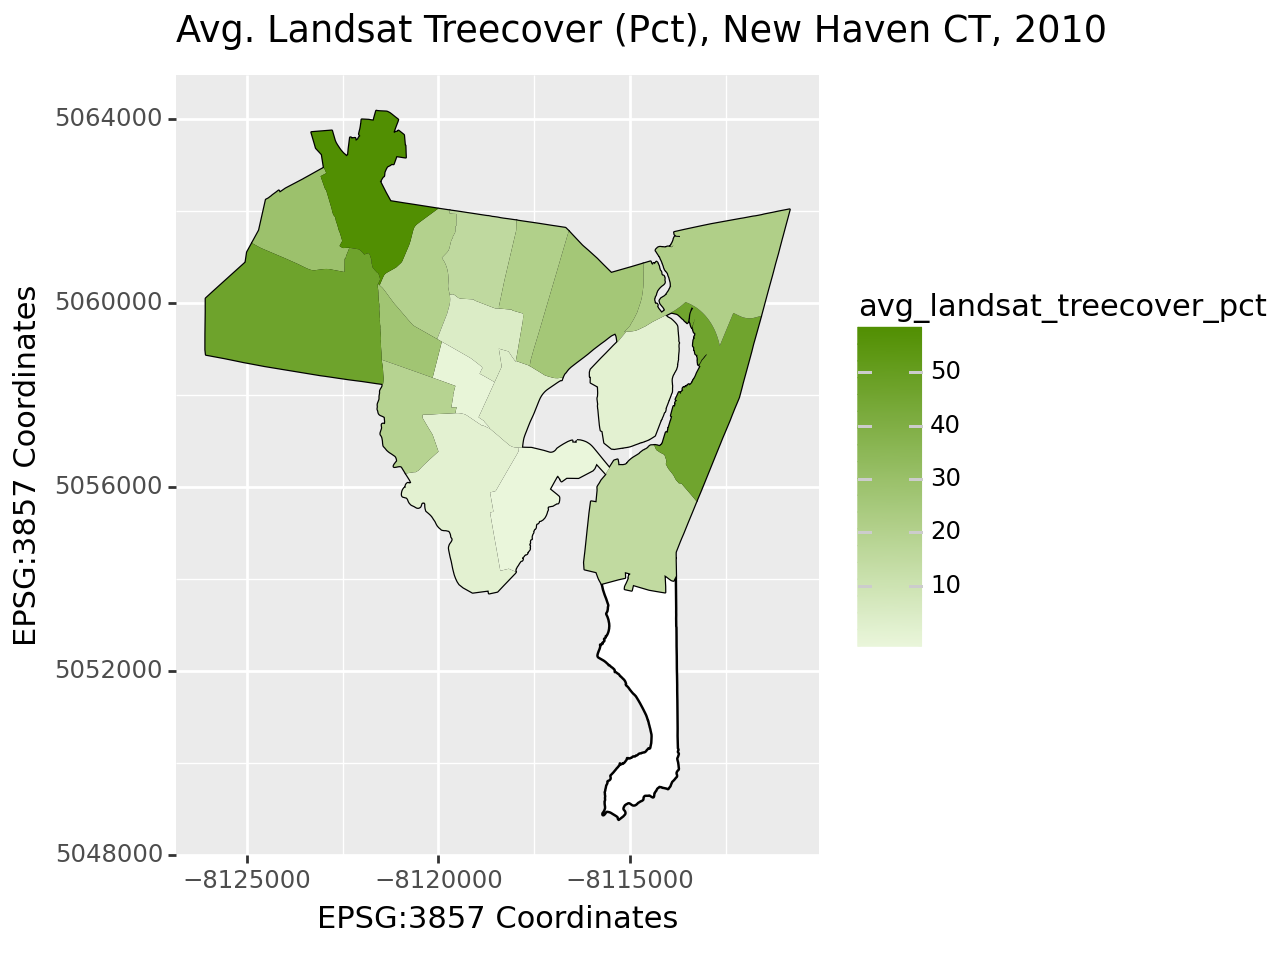

<Figure Size: (640 x 480)>

In [148]:
# check graph of avg_landsat_treecover_pct by neighborhood
(
  ggplot()
   + geom_map(nei_pre_merge, fill = 'white', color = 'black')
   + geom_map(geo_avg_landsat, aes(geometry='geometry', fill="avg_landsat_treecover_pct"),color=None)
   + scale_fill_gradient(low="#eaf6db", high="#518f02")
   + xlab("EPSG:3857 Coordinates")
   + ylab("EPSG:3857 Coordinates")
   + ggtitle("Avg. Landsat Treecover (Pct), New Haven CT, 2010")
)